<a href="https://colab.research.google.com/github/preetikhullbe/mobile-price-prediction/blob/main/Mobile_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title : Mobile price Prediction**

# **The Problem**
The data contains information regarding mobile phone features, specifications etc and their price range. The various features and information can be used to predict the price range of a mobile phone.In the competitive mobile phone market companies want
to understand sales data of mobile phones and factors which drive the prices.
The objective is to find out some relation between features of a mobile phone(eg:- RAM,
Internal Memory, etc) and its selling price. In this problem, we do not have to predict the
actual price but a price range indicating how high the price is.


# **Introduction**
Mobile phones come in all sorts of prices, features, specifications and all. Price estimation and prediction is an important part of consumer strategy. Deciding on the correct price of a product is very important for the market success of a product. A new product that has to be launched, must have the correct price so that consumers find it appropriate to buy the product.

# **Data description**

**battery_power** - Total energy a battery can store in one time measured in mAh

**Blue** - Has bluetooth or not

**Clock_speed** - speed at which microprocessor executes instructions

**Dual_sim** - Has dual sim support or not

**Fc** - Front Camera mega pixels

**Four_g** - Has 4G or not

**Int_memory** - Internal Memory in Gigabytes

**M_dep** - Mobile Depth in cm

**Mobile_wt** - Weight of mobile phone

**N_cores** - Number of cores of processor

**Pc** - Primary Camera mega pixels

**Px_height** - Pixel Resolution Height

**Px_width** - Pixel Resolution Width

**Ram** - Random Access Memory in Mega Bytes

**Sc_h** - Screen Height of mobile in cm

**Sc_w** - Screen Width of mobile in cm

**Talk_time** - longest time that a single battery charge will last when you are

**Three_g** - Has 3G or not

**Touch_screen** - Has touch screen or not

**Wifi** - Has wifi or not

**Price_range** - This is the target variable with value of 0(low cost), 1(medium cost),
2(high cost) and 3(very high cost).

In [15]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
from datetime import datetime
import datetime as dt

In [16]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [17]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
mobile_price_df=pd.read_csv("//content/drive/MyDrive/data_mobile_price_range.csv",encoding="unicode_escape")
mobile_price_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [19]:
mobile_price_df.shape

(2000, 21)

In [20]:
mobile_price_df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [21]:
mobile_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [22]:
mobile_price_df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [23]:
mobile_price_df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


**Handling mismatch data**


In [24]:
#checking how many observations having "screen width" value as 0.
print(mobile_price_df[mobile_price_df['sc_w']==0].shape[0])

180


**So there must be some mistake here beacause "sc_w"(screen width) can't be zero.**


In [25]:
#Replacing all the values which is 0 with the mean value
mobile_price_df['sc_w'].replace(0,mobile_price_df['sc_w'].mean(),inplace=True)

In [26]:
#checking how many observations having "screen width" value as 0.
print(mobile_price_df[mobile_price_df['sc_w']==0].shape[0])

0


In [27]:
mobile_price_df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [28]:
mobile_price_df['sc_w'].nunique()

19

In [29]:
#checking how many observations having "px_height" value as 0.
print(mobile_price_df[mobile_price_df['px_height']==0].shape[0])

2


In [30]:
#so we have only two values as 0 in px_height,we can drop this out
mobile_price_df =mobile_price_df.loc[mobile_price_df["px_height"] != 0 ]

In [31]:
mobile_price_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1998 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1998 non-null   int64  
 1   blue           1998 non-null   int64  
 2   clock_speed    1998 non-null   float64
 3   dual_sim       1998 non-null   int64  
 4   fc             1998 non-null   int64  
 5   four_g         1998 non-null   int64  
 6   int_memory     1998 non-null   int64  
 7   m_dep          1998 non-null   float64
 8   mobile_wt      1998 non-null   int64  
 9   n_cores        1998 non-null   int64  
 10  pc             1998 non-null   int64  
 11  px_height      1998 non-null   int64  
 12  px_width       1998 non-null   int64  
 13  ram            1998 non-null   int64  
 14  sc_h           1998 non-null   int64  
 15  sc_w           1998 non-null   float64
 16  talk_time      1998 non-null   int64  
 17  three_g        1998 non-null   int64  
 18  touch_sc

In [32]:
mobile_price_df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,1998.0,1238.391391,439.369721,501.0,851.25,1226.000,1615.00,1998.0
blue,1998.0,0.494995,0.500100,0.0,0.00,0.000,1.00,1.0
clock_speed,1998.0,1.521722,0.816240,0.5,0.70,1.500,2.20,3.0
dual_sim,1998.0,0.510010,0.500025,0.0,0.00,1.000,1.00,1.0
fc,1998.0,4.308809,4.343101,0.0,1.00,3.000,7.00,19.0
four_g,1998.0,0.521021,0.499683,0.0,0.00,1.000,1.00,1.0
int_memory,1998.0,32.057558,18.141468,2.0,16.00,32.000,48.00,64.0
m_dep,1998.0,0.501902,0.288411,0.1,0.20,0.500,0.80,1.0
mobile_wt,1998.0,140.262763,35.404007,80.0,109.00,141.000,170.00,200.0
n_cores,1998.0,4.519019,2.287627,1.0,3.00,4.000,7.00,8.0


In [33]:
mobile_price_df.shape

(1998, 21)

In [34]:
# Checking Duplicate Values
value=len(mobile_price_df[mobile_price_df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


So, there are mobile phones in 4 price ranges. The number of elements is almost similar.

# Data Distribution

Let us analyse some data features and see their distribution

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


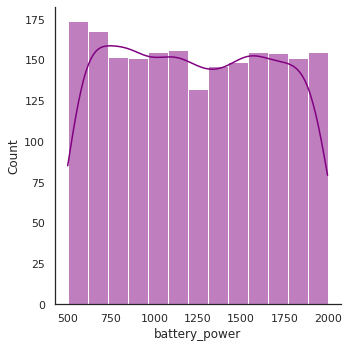

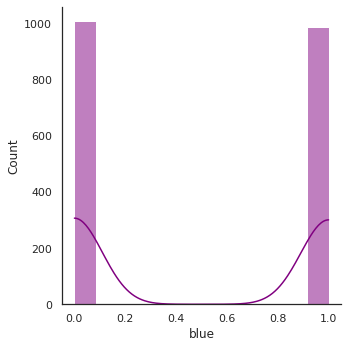

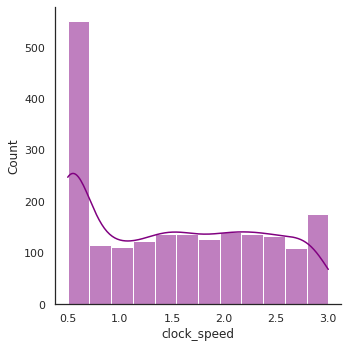

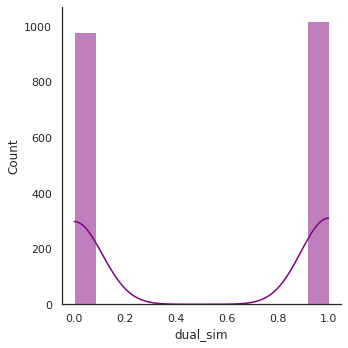

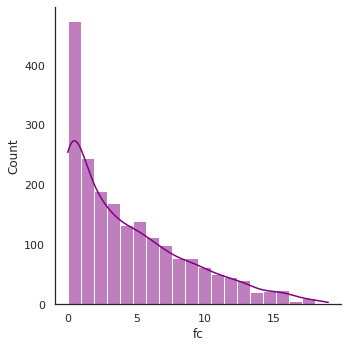

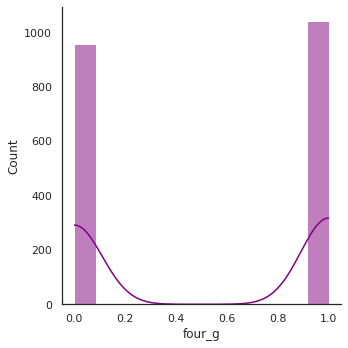

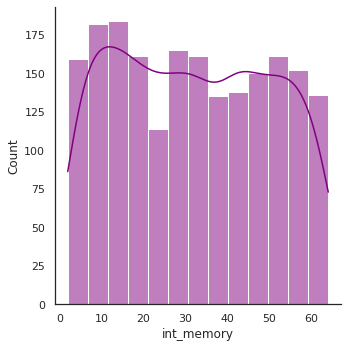

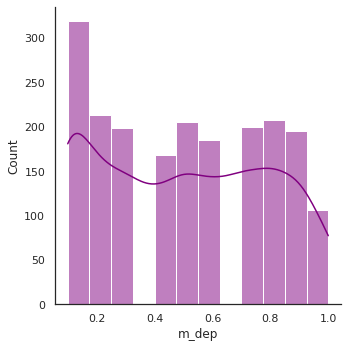

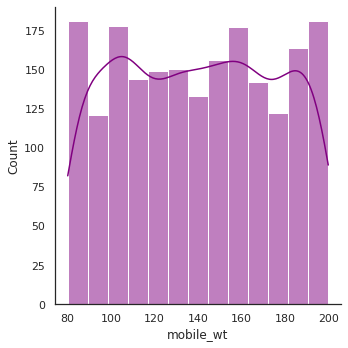

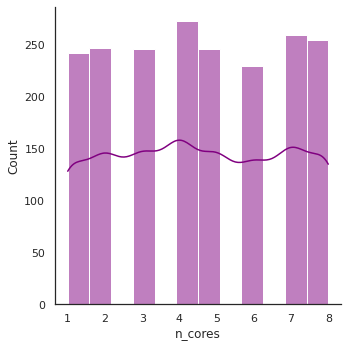

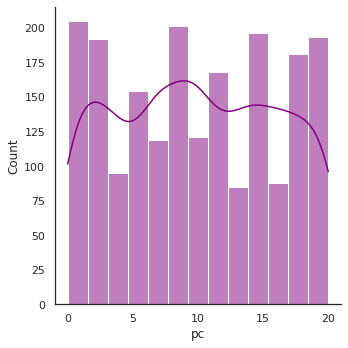

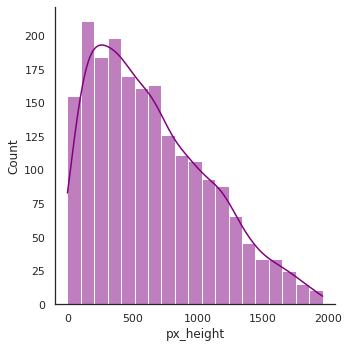

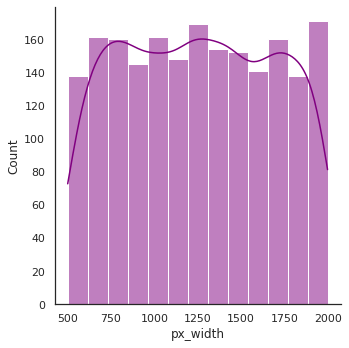

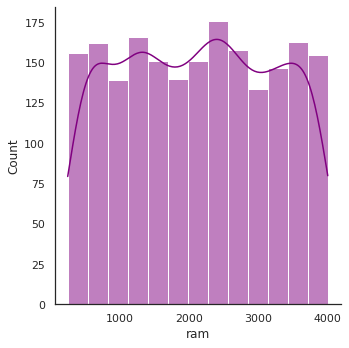

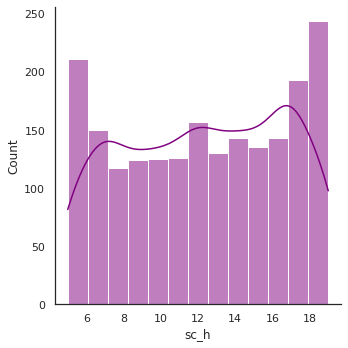

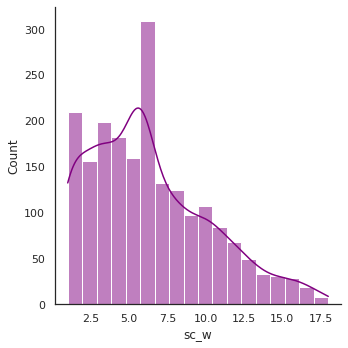

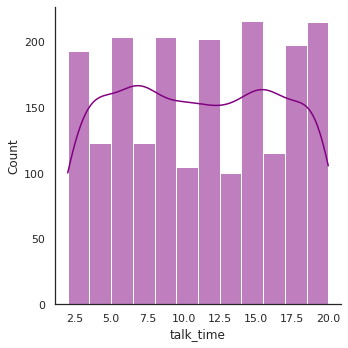

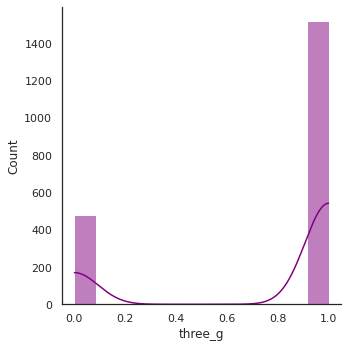

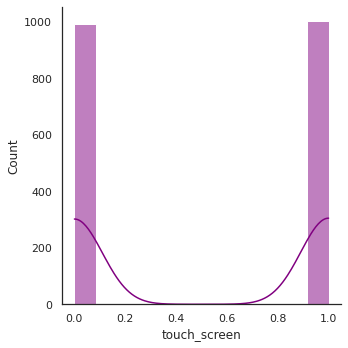

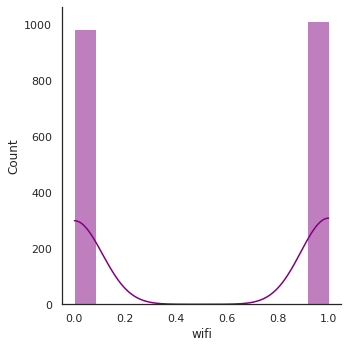

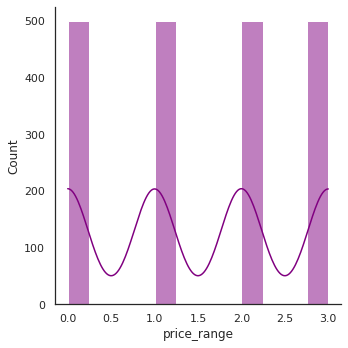

In [35]:
col=mobile_price_df.columns
for x in col:
  sns.set(rc={'figure.figsize':(10,5)})
  sns.set_style('white')
  ax=sns.displot(data=mobile_price_df[x],kde = True, color ='purple')
  plt.xlabel(x)
plt.show()

# **Checking for Outliers**

<ipython-input-36-0105fa69d232>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,5))


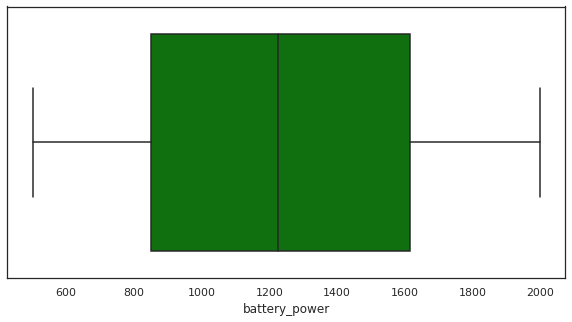

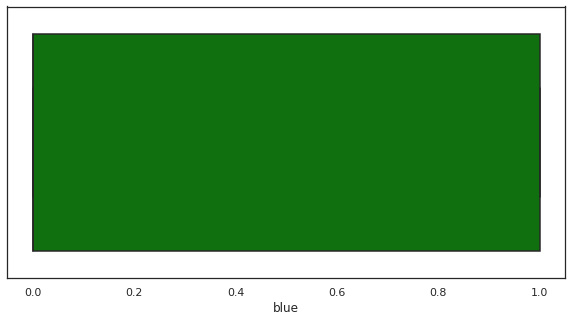

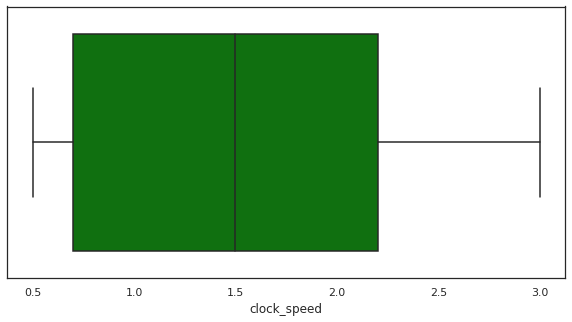

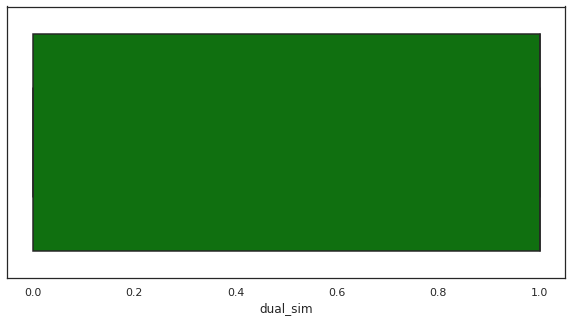

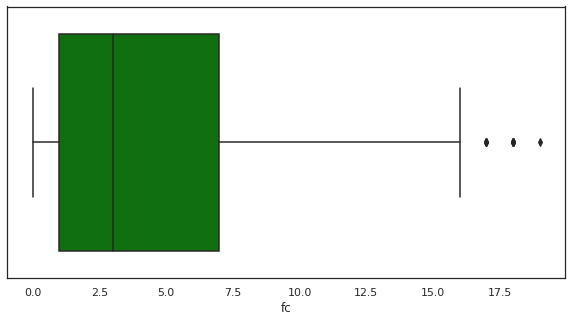

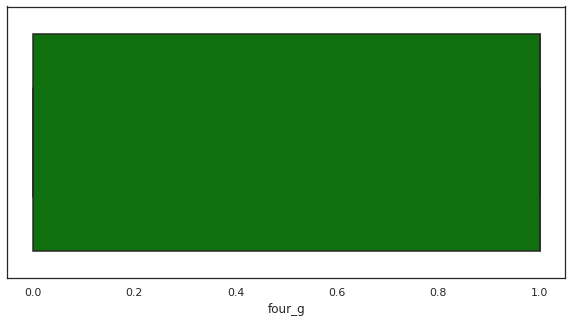

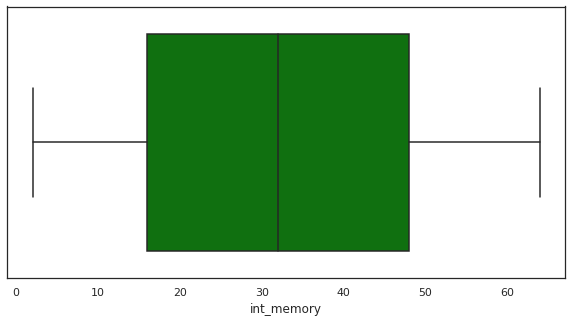

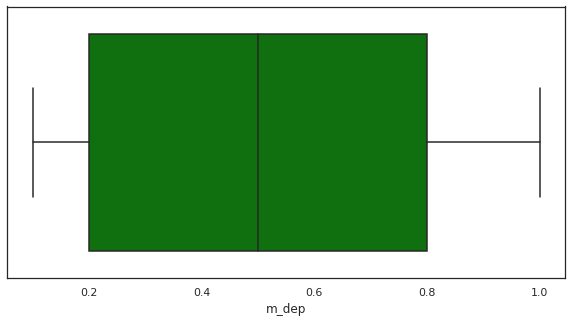

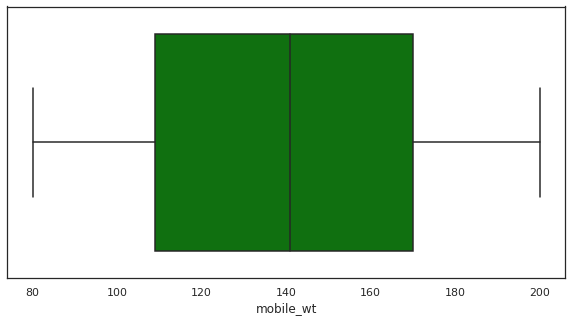

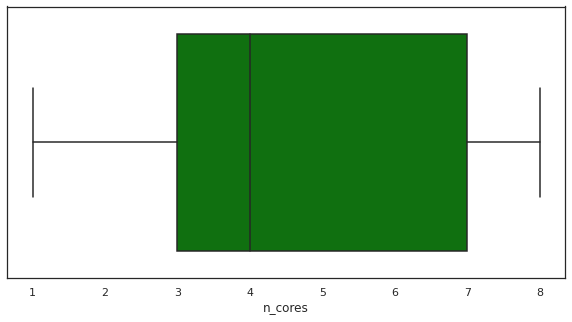

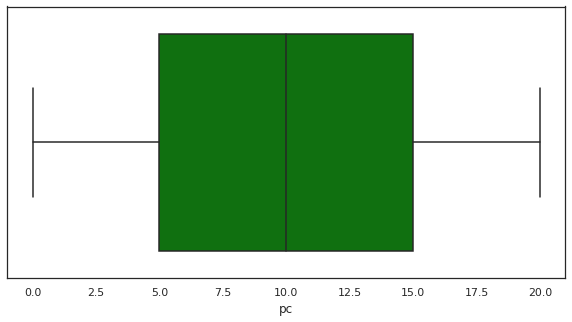

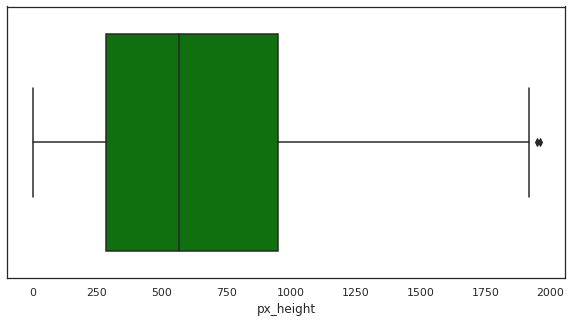

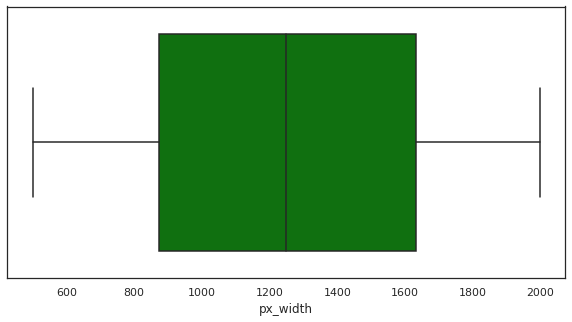

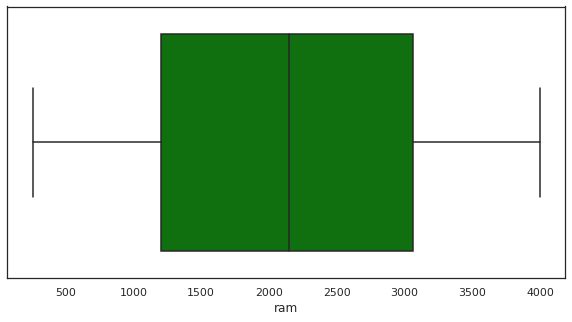

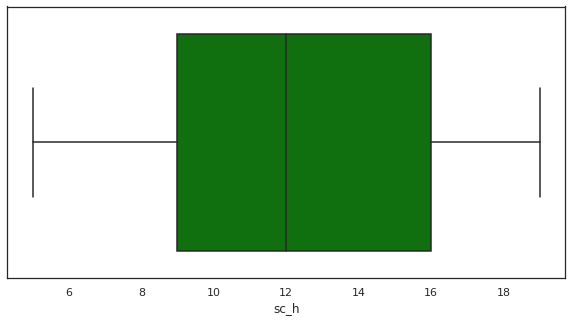

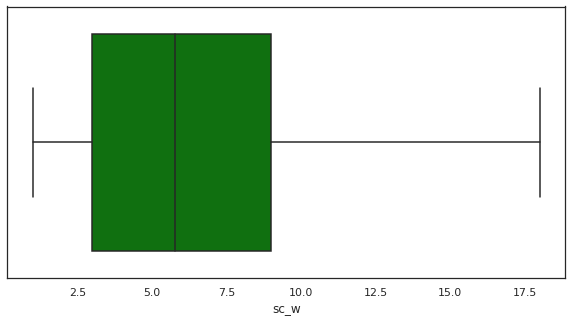

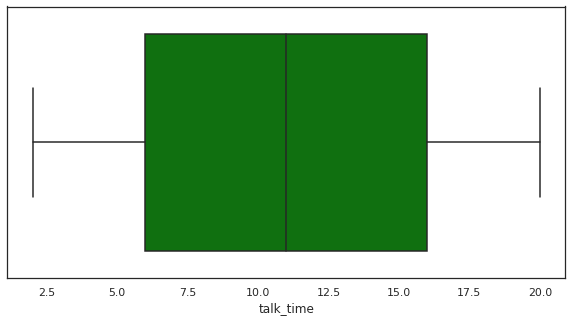

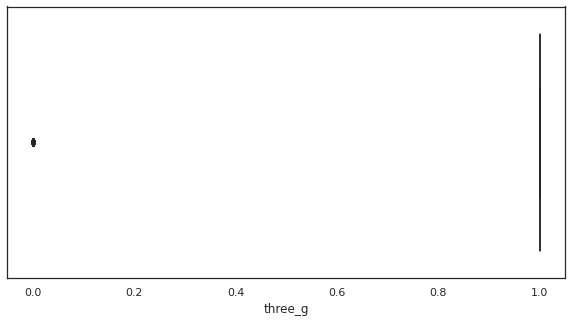

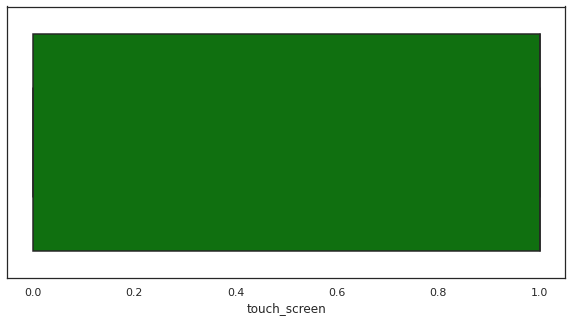

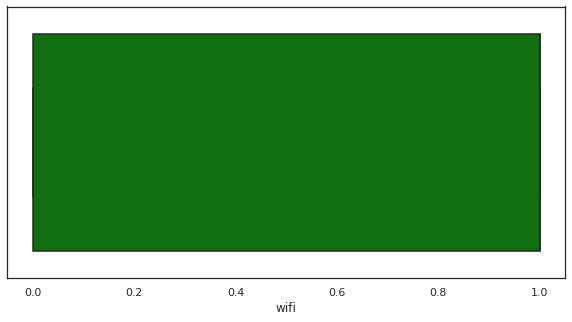

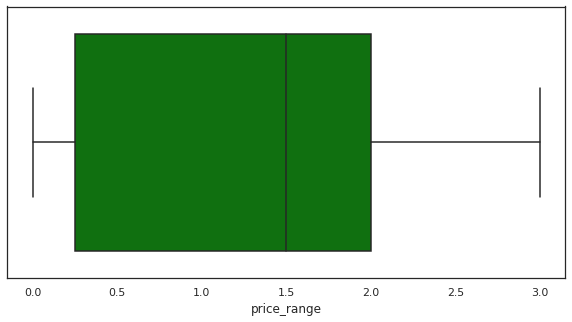

In [36]:
#finding presence of outliers using boxplot of all numerical features
for col in mobile_price_df:
  plt.figure(figsize=(10,5))
  sns.boxplot(x=mobile_price_df[col],color='green')
  plt.xlabel(col)
plt.show()

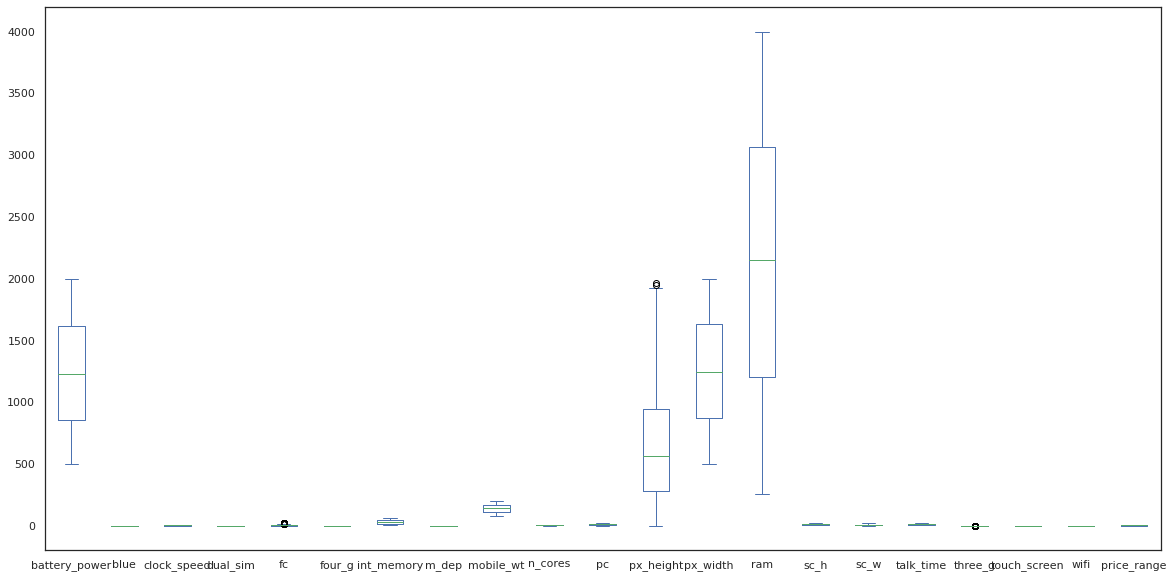

In [37]:
mobile_price_df.plot(kind='box',figsize=(20,10))

# **Normalizing and Removing outliers**

In [38]:
#
mobile_price_df['fc']=np.sqrt(mobile_price_df['fc'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


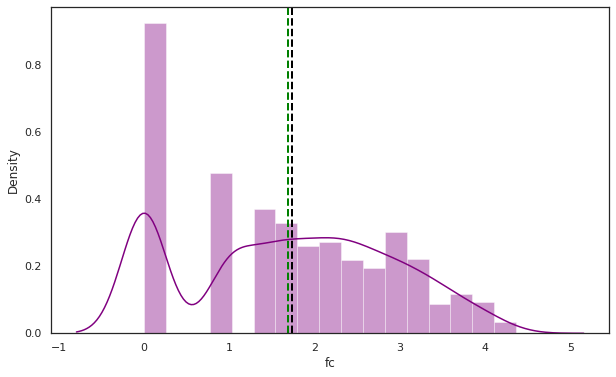

In [39]:
#Distribution plot of Rented Bike Count
plt.figure(figsize=(10,6))
plt.xlabel('fc')
plt.ylabel('Density')
ax=sns.distplot(mobile_price_df['fc'],hist=True ,color="purple")
ax.axvline(mobile_price_df['fc'].mean(), color='green', linestyle='dashed', linewidth=2)
ax.axvline(mobile_price_df['fc'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


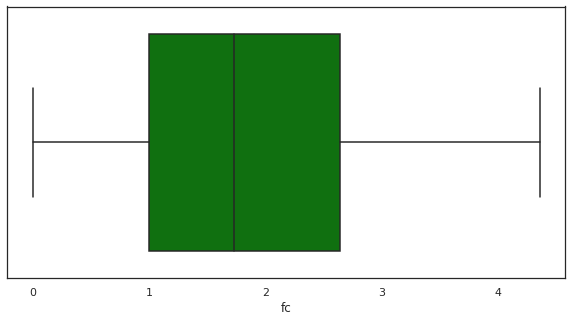

In [40]:
sns.boxplot(mobile_price_df['fc'],color='green')

In [41]:
mobile_price_df['px_height']=np.sqrt(mobile_price_df['px_height'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


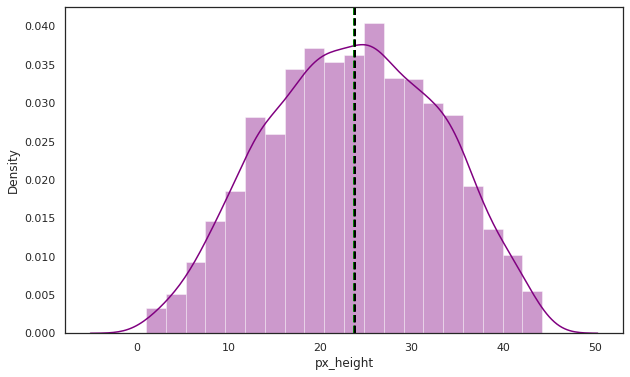

In [42]:
#Distribution plot of Rented Bike Count
plt.figure(figsize=(10,6))
plt.xlabel('px_height')
plt.ylabel('Density')
ax=sns.distplot(mobile_price_df['px_height'],hist=True ,color="purple")
ax.axvline(mobile_price_df['px_height'].mean(), color='green', linestyle='dashed', linewidth=2)
ax.axvline(mobile_price_df['px_height'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


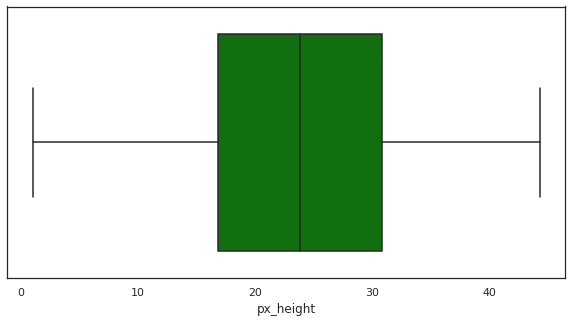

In [43]:
sns.boxplot(mobile_price_df['px_height'],color='green')

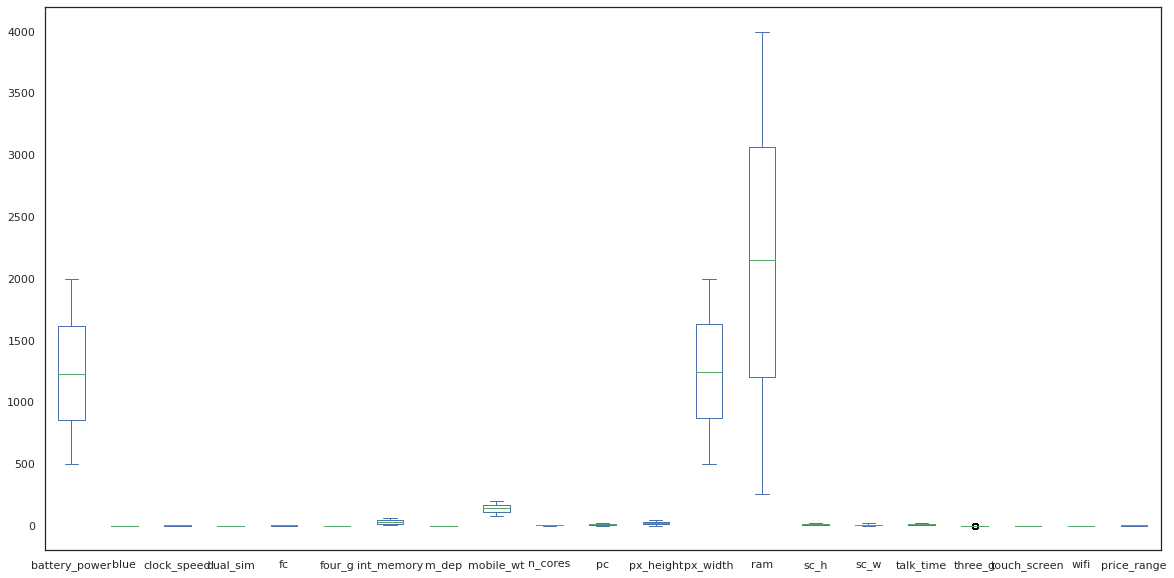

In [44]:
#checking for outliers after normalization of data
mobile_price_df.plot(kind='box',figsize=(20,10))

# **Correlation**

Now check the correlation of the features for the knowledge only. Because there is no need to check correlation. All features are necessary to predict the price range of the mobile.

In [160]:
# full correlation table
mobile_price_df.corr().style.background_gradient(cmap='viridis')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.012329,0.011238,-0.041599,0.033906,0.015404,-0.004951,0.035201,0.002788,-0.029017,0.031344,0.015760,-0.009801,-0.001694,-0.030591,-0.021559,0.051655,0.011369,-0.010815,-0.008059,0.199861
blue,0.012329,1.000000,0.021489,0.035244,-0.000113,0.013446,0.042283,0.003191,-0.009386,0.035318,-0.009876,-0.006976,-0.040443,0.027172,-0.002237,-0.022669,0.014769,-0.030262,0.010061,-0.021875,0.021484
clock_speed,0.011238,0.021489,1.000000,-0.000656,-0.004959,-0.043723,0.006882,-0.013981,0.012656,-0.006094,-0.005314,-0.011069,-0.009914,0.002978,-0.028784,-0.003781,-0.011547,-0.046813,0.019126,-0.023832,-0.006955
dual_sim,-0.041599,0.035244,-0.000656,1.000000,-0.034316,0.004168,-0.016321,-0.022702,-0.009384,-0.024025,-0.017053,-0.020281,0.014875,0.041775,-0.012519,-0.005030,-0.039347,-0.013446,-0.016120,0.021728,0.017919
fc,0.033906,-0.000113,-0.004959,-0.034316,1.000000,-0.024757,-0.025354,0.014060,0.028329,-0.017283,0.660959,-0.019835,-0.009300,0.019959,-0.007872,-0.004771,-0.004350,-0.013387,-0.019054,0.013216,0.024280
four_g,0.015404,0.013446,-0.043723,0.004168,-0.024757,1.000000,0.009285,-0.001320,-0.016178,-0.030358,-0.005693,-0.023766,0.006927,0.006700,0.027714,0.032352,-0.046751,0.584069,0.015820,-0.016664,0.014357
int_memory,-0.004951,0.042283,0.006882,-0.016321,-0.025354,0.009285,1.000000,0.007482,-0.033675,-0.027036,-0.033326,-0.000622,-0.009215,0.032411,0.036733,0.005863,-0.003602,-0.009033,-0.026425,0.006383,0.043825
m_dep,0.035201,0.003191,-0.013981,-0.022702,0.014060,-0.001320,0.007482,1.000000,0.020896,-0.003926,0.026418,0.024928,0.024887,-0.008409,-0.025042,-0.011709,0.017779,-0.011778,-0.002116,-0.028917,0.001866
mobile_wt,0.002788,-0.009386,0.012656,-0.009384,0.028329,-0.016178,-0.033675,0.020896,1.000000,-0.019435,0.018953,0.012178,0.001199,-0.001710,-0.033540,-0.035442,0.006888,0.001769,-0.013994,-0.000804,-0.029459
n_cores,-0.029017,0.035318,-0.006094,-0.024025,-0.017283,-0.030358,-0.027036,-0.003926,-0.019435,1.000000,-0.001184,-0.001913,0.025162,0.005155,0.000663,0.021410,0.013823,-0.015106,0.023156,-0.009317,0.004897


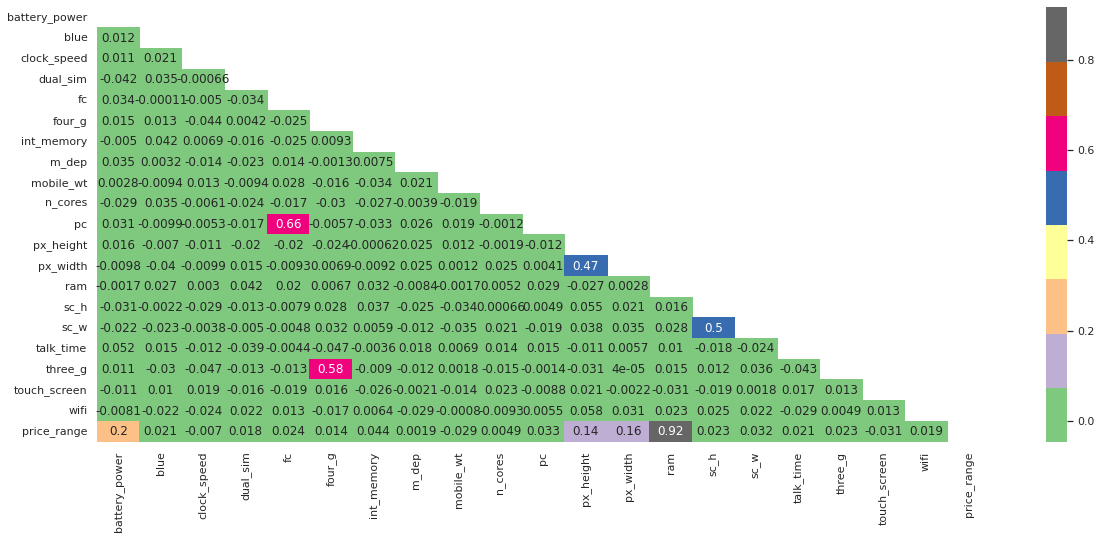

In [166]:
## plot the Correlation matrix
plt.figure(figsize=(20,8))
correlation=mobile_price_df.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap((correlation),mask=mask, annot=True,cmap='Accent')

Text(0, 0.5, 'ram')

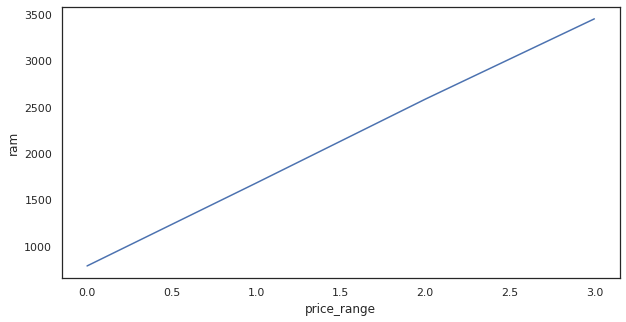

In [46]:
#plot to analyze the relationship between "price_range" and "ram"  
mobile_price_df.groupby('price_range').mean()['ram'].plot()
plt.ylabel("ram")

Text(0, 0.5, 'battery power')

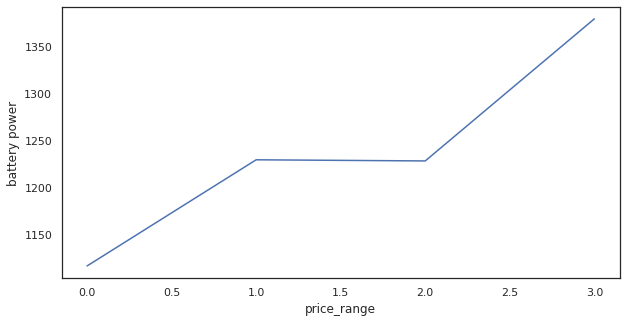

In [47]:
#plot to analyze the relationship between "price_range" and "battery_power"    
mobile_price_df.groupby('price_range').mean()['battery_power'].plot()
plt.ylabel("battery power")

Text(0, 0.5, 'bluetooth')

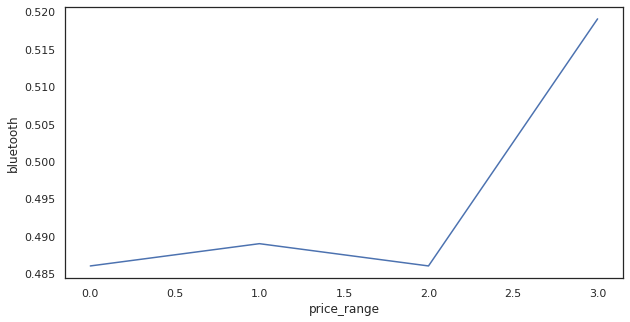

In [48]:
#plot to analyze the relationship between "price_range" and "blue"  
mobile_price_df.groupby('price_range').mean()['blue'].plot()
plt.ylabel("bluetooth")

Text(0, 0.5, 'clock_speed')

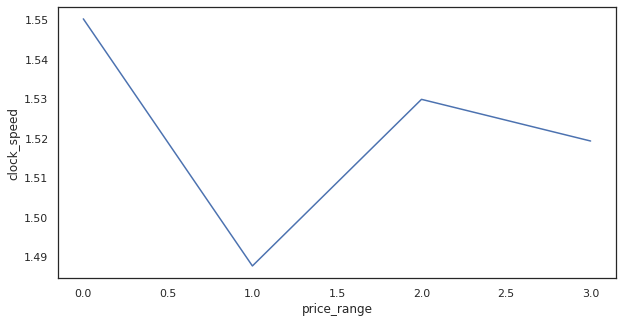

In [49]:
#plot to analyze the relationship between "price_range" and "clock_speed"    
mobile_price_df.groupby('price_range').mean()['clock_speed'].plot()
plt.ylabel("clock_speed")

Text(0, 0.5, 'dual_sim')

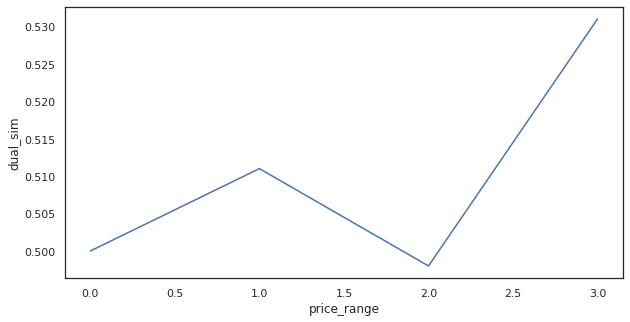

In [50]:
#plot to analyze the relationship between "price_range" and "dual_sim"    
mobile_price_df.groupby('price_range').mean()['dual_sim'].plot()
plt.ylabel("dual_sim")

Text(0, 0.5, 'fc')

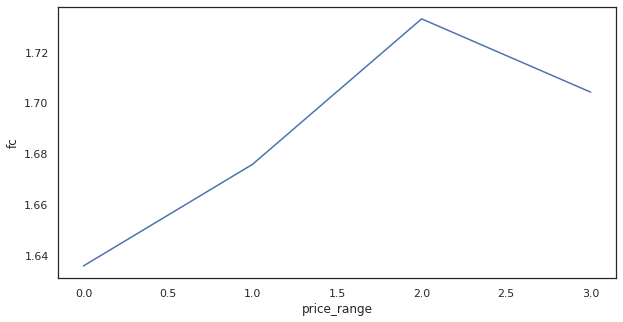

In [51]:
#plot to analyze the relationship between "price_range" and "fc"   
mobile_price_df.groupby('price_range').mean()['fc'].plot()
plt.ylabel("fc")

Text(0, 0.5, 'four_g')

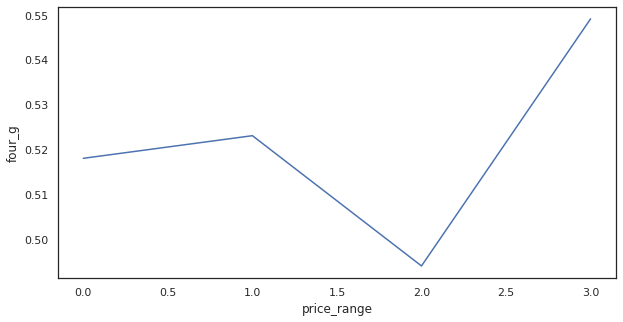

In [52]:
#plot to analyze the relationship between "price_range" and "four_g"    
mobile_price_df.groupby('price_range').mean()['four_g'].plot()
plt.ylabel("four_g")

Text(0, 0.5, 'int_memory')

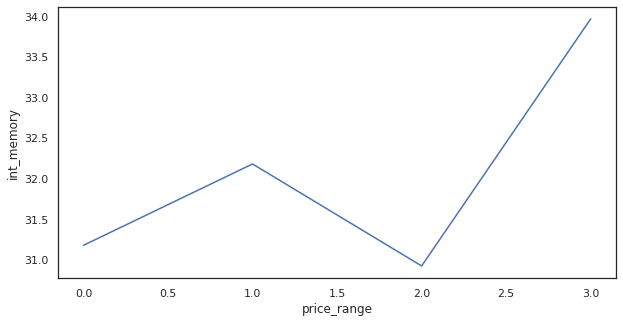

In [53]:
#plot to analyze the relationship between "price_range" and "int_memory"  
mobile_price_df.groupby('price_range').mean()['int_memory'].plot()
plt.ylabel("int_memory")

Text(0, 0.5, 'mobile_wt')

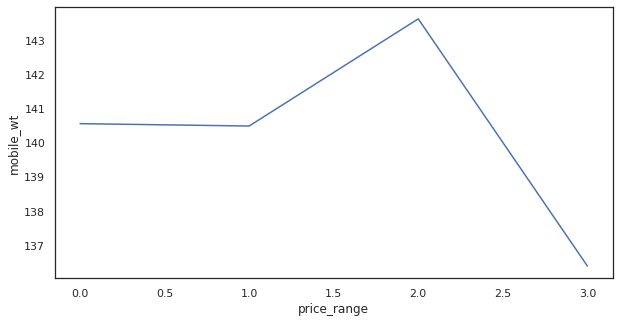

In [54]:
#plot to analyze the relationship between "price_range" and "mobile_wt"   
mobile_price_df.groupby('price_range').mean()['mobile_wt'].plot()
plt.ylabel("mobile_wt")

Text(0, 0.5, 'three_g')

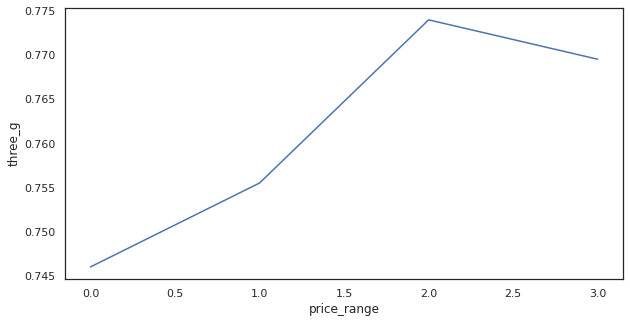

In [55]:
#plot to analyze the relationship between "price_range" and "three_g"  
mobile_price_df.groupby('price_range').mean()['three_g'].plot()
plt.ylabel("three_g")

Text(0, 0.5, 'touch_screen')

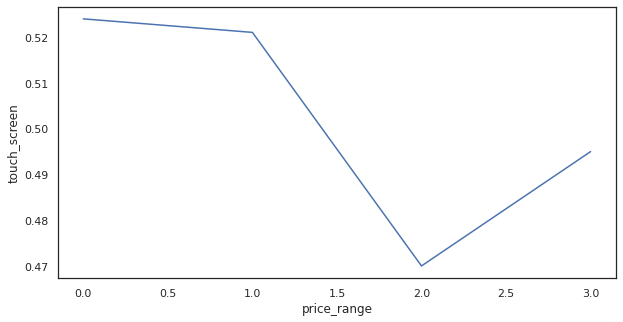

In [56]:
#plot to analyze the relationship between "price_range" and "touch_screen"  
mobile_price_df.groupby('price_range').mean()['touch_screen'].plot()
plt.ylabel("touch_screen")

Text(0, 0.5, 'wifi')

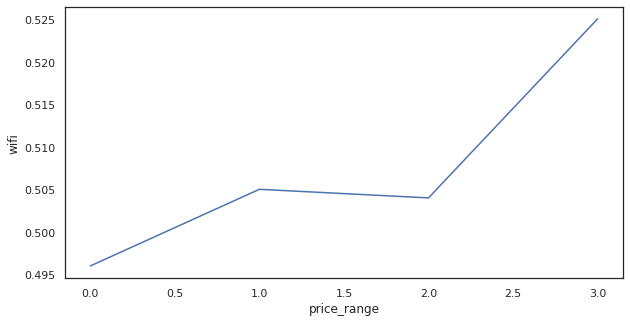

In [57]:
#plot to analyze the relationship between "price_range" and "wifi"  
mobile_price_df.groupby('price_range').mean()['wifi'].plot()
plt.ylabel("wifi")

In [58]:
mobile_price_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1998 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1998 non-null   int64  
 1   blue           1998 non-null   int64  
 2   clock_speed    1998 non-null   float64
 3   dual_sim       1998 non-null   int64  
 4   fc             1998 non-null   float64
 5   four_g         1998 non-null   int64  
 6   int_memory     1998 non-null   int64  
 7   m_dep          1998 non-null   float64
 8   mobile_wt      1998 non-null   int64  
 9   n_cores        1998 non-null   int64  
 10  pc             1998 non-null   int64  
 11  px_height      1998 non-null   float64
 12  px_width       1998 non-null   int64  
 13  ram            1998 non-null   int64  
 14  sc_h           1998 non-null   int64  
 15  sc_w           1998 non-null   float64
 16  talk_time      1998 non-null   int64  
 17  three_g        1998 non-null   int64  
 18  touch_sc

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


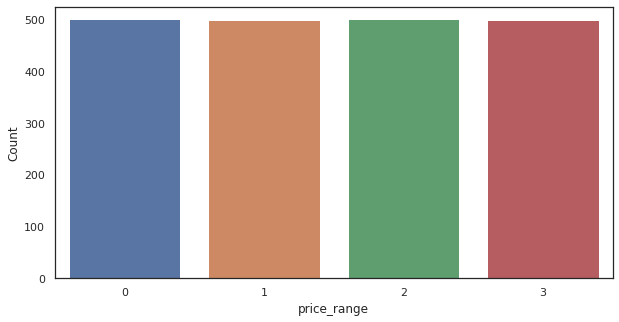

In [59]:
#count plot on price range
sns.countplot(mobile_price_df['price_range'])
plt.xlabel('price_range')
plt.ylabel('Count')
plt.show()

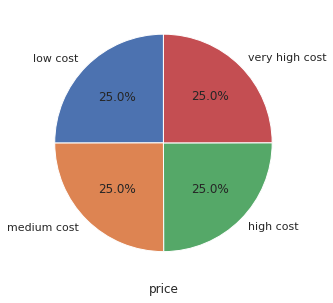

In [60]:
#plotting pie chart to know pecentage of each value
labels = ['low cost','medium cost','high cost','very high cost']
values = mobile_price_df['price_range'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',startangle=90)
plt.xlabel("price")
plt.show()

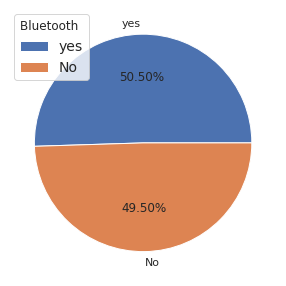

In [61]:
#plotting pie chart to know pecentage of each value
labels = ["yes",'No']
values = mobile_price_df['blue'].value_counts().values
plt.pie(values,labels = labels, autopct="%0.2f%%")
plt.legend(title="Bluetooth ",loc="upper left", fontsize=14)
plt.axis
plt.show() 

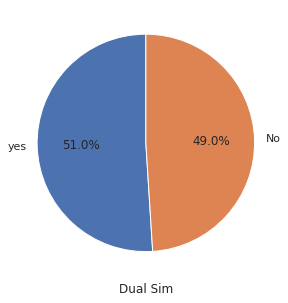

In [62]:
#plotting pie chart to know pecentage of each value
labels = ["yes",'No']
values = mobile_price_df['dual_sim'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',startangle=90)
plt.xlabel('Dual Sim')
plt.show()

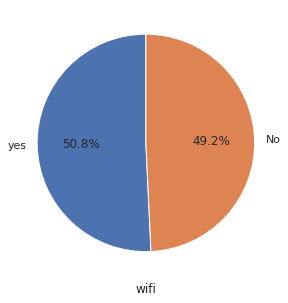

In [63]:
#plotting pie chart to know pecentage of each value
labels = ["yes",'No']
values = mobile_price_df['wifi'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',startangle=90)
plt.xlabel('wifi')
plt.show()

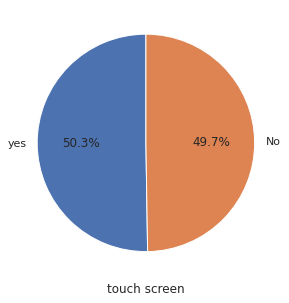

In [64]:
#plotting pie chart to know pecentage of each value
labels = ["yes",'No']
values = mobile_price_df['touch_screen'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',startangle=90)
plt.xlabel("touch screen")
plt.show()

# % of Phones which support 3G

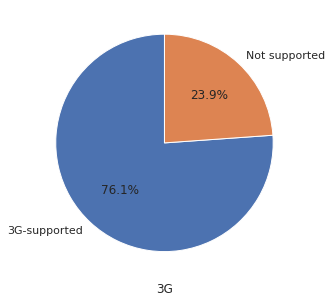

In [65]:
labels = ["3G-supported",'Not supported']
values = mobile_price_df['three_g'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',startangle=90)
plt.xlabel("3G")
plt.show()

# % of Phones which support 4G

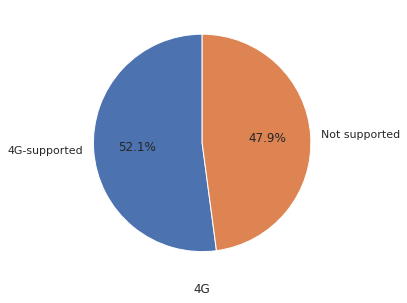

In [66]:
labels4g = ["4G-supported",'Not supported']
values4g = mobile_price_df['four_g'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values4g, labels=labels4g, autopct='%1.1f%%',startangle=90)
plt.xlabel("4G")
plt.show()

# No of Phones vs Camera megapixels of front and primary camera

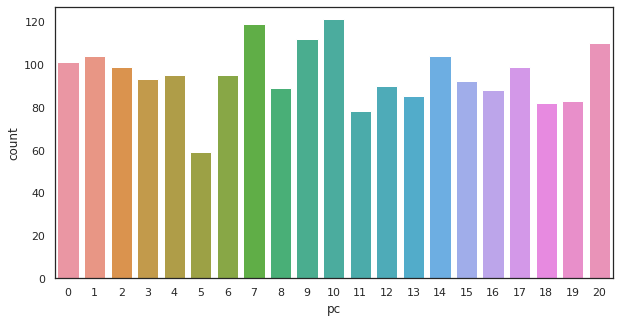

In [67]:
sns.countplot(x="pc",data=mobile_price_df)

In [68]:
round_=round(mobile_price_df['fc'],2)

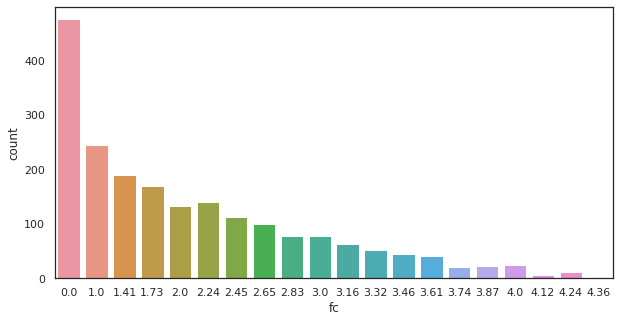

In [69]:
sns.countplot(x=round_,data=mobile_price_df)

# Battery power vs Price Range

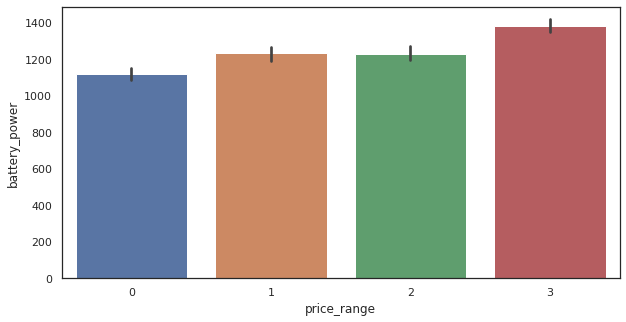

In [70]:
sns.barplot(x="price_range", y="battery_power", data=mobile_price_df)

# **price range vs fc(front camera)**

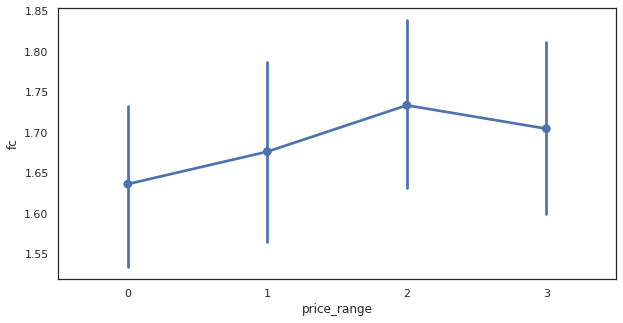

In [71]:
sns.pointplot(x="price_range", y="fc", data=mobile_price_df)

# **price range vs pc(primary camera)**

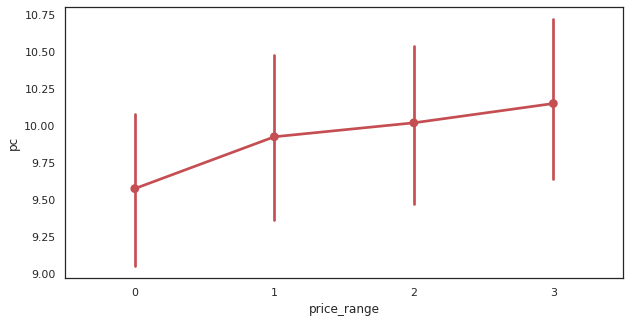

In [72]:
sns.pointplot(x="price_range", y="pc",color='r',data=mobile_price_df)

# **Mobile Weight vs Price range**

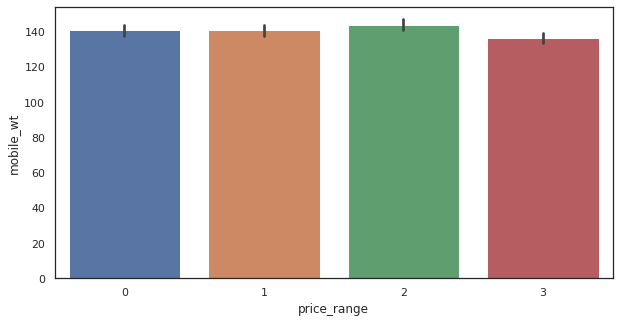

In [73]:
sns.barplot(x="price_range", y="mobile_wt", data=mobile_price_df)

In [74]:
mobile_price_df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

# **Ram vs Price range**

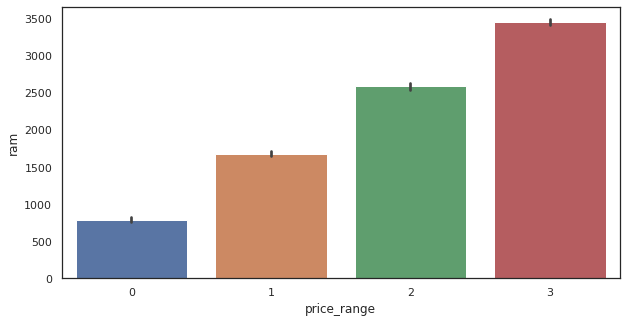

In [75]:
sns.barplot(x="price_range",y="ram",data=mobile_price_df)

# **Price range grouped by m_dep**

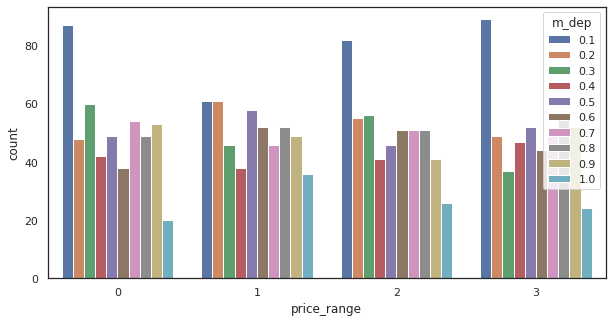

In [76]:
sns.countplot(x="price_range",hue="m_dep",data=mobile_price_df)

# **Price range grouped by n-cores**

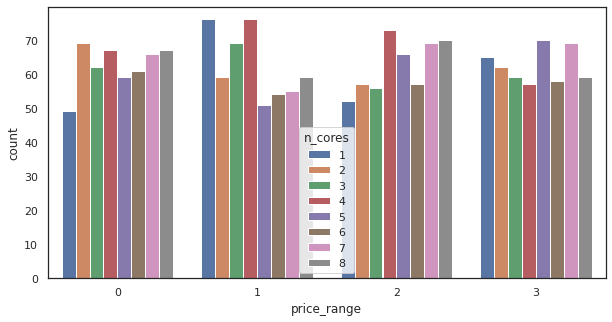

In [77]:
sns.countplot(x="price_range",hue="n_cores",data=mobile_price_df)

# **Talk time vs Price range**

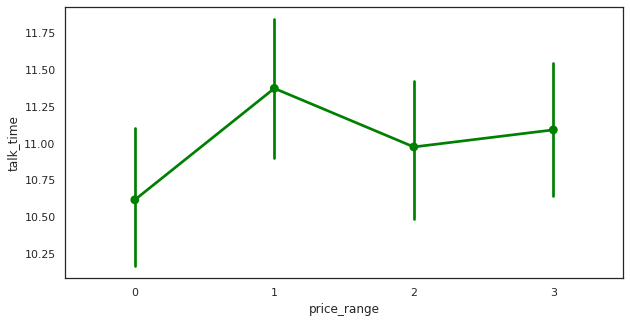

In [78]:
sns.pointplot(y="talk_time", x="price_range",color='green',data=mobile_price_df)

# **X & Y array**

In [79]:
#Assign the value in X and Y
#independent features
X =mobile_price_df.drop('price_range',axis=1)
#dependent(target) feature
y =mobile_price_df['price_range']

# **Splitting the data**

In [80]:
#importing model
from sklearn.model_selection import train_test_split

In [81]:
#splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [82]:
#Normalizing data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(X_train)
x_test=sc.fit_transform(X_test)


In [83]:
x_train

array([[-0.21010402,  1.01151117,  1.45068552, ...,  0.56358219,
        -1.00862085,  0.99571733],
       [-1.36537519, -0.98861983,  0.46229278, ..., -1.7743641 ,
        -1.00862085,  0.99571733],
       [-1.69285364,  1.01151117,  1.57423461, ...,  0.56358219,
        -1.00862085, -1.0043011 ],
       ...,
       [ 0.68363923,  1.01151117, -0.03190359, ...,  0.56358219,
        -1.00862085, -1.0043011 ],
       [ 0.36753156,  1.01151117, -1.26739452, ...,  0.56358219,
         0.99145283, -1.0043011 ],
       [ 0.4016439 , -0.98861983, -0.40255087, ...,  0.56358219,
         0.99145283,  0.99571733]])

In [84]:
x_test

array([[ 0.34965236, -0.99335541, -1.21768046, ...,  0.55167728,
        -0.9966722 , -1.040833  ],
       [-1.38603202, -0.99335541, -1.21768046, ...,  0.55167728,
         1.00333891,  0.96076892],
       [-1.43862851, -0.99335541, -0.13494137, ...,  0.55167728,
        -0.9966722 ,  0.96076892],
       ...,
       [-0.48960478, -0.99335541,  1.54931944, ...,  0.55167728,
         1.00333891,  0.96076892],
       [-0.05053837,  1.00668904,  1.78992812, ...,  0.55167728,
         1.00333891, -1.040833  ],
       [-0.83948582,  1.00668904, -0.01463703, ...,  0.55167728,
         1.00333891,  0.96076892]])

**Now, we define a function for creating a confusion matrix.**

In [85]:
#making a fuction for confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
def my_confusion_matrix(y_test, y_pred, plt_title):
    cm=confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm

**Now, as the function is defined, we can proceed with implementing the classification algorithms.**

# **Random Forest Classifier**

**A random forest is a supervised machine learning method built from decision tree techniques. This algorithm is used to anticipate behaviour and results in a variety of sectors, including banking and e-commerce.**
**A random forest is a machine learning approach for solving regression and classification issues. It makes use of ensemble learning, which is a technique that combines multiple classifiers to solve complicated problems.**
**A random forest method is made up of a large number of decision trees. The random forest algorithm’s ‘forest’ is trained via bagging or bootstrap aggregation. Bagging is a meta-algorithm ensemble that increases the accuracy of machine learning algorithms.**

**Now, we do the training and prediction.**

In [86]:
#building the model
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(bootstrap= True,
                           max_depth= 7,
                           max_features= 15,
                           min_samples_leaf= 3,
                           min_samples_split= 10,
                           n_estimators= 200,
                           random_state=7)

**Let us now implement the random forest algorithm.**

In [87]:
#fiting data
rfc.fit(x_train, y_train)
y_pred_rfc=rfc.predict(x_test)

In [88]:
# Making predictions on train and test data
y_pred_train_r = rfc.predict(x_train)
y_pred_test_r = rfc.predict(x_test)

Random Forest Classifier Accuracy Score:  0.9706723891273248
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       343
           1       0.96      0.97      0.96       361
           2       0.95      0.98      0.96       334
           3       0.99      0.97      0.98       360

    accuracy                           0.97      1398
   macro avg       0.97      0.97      0.97      1398
weighted avg       0.97      0.97      0.97      1398



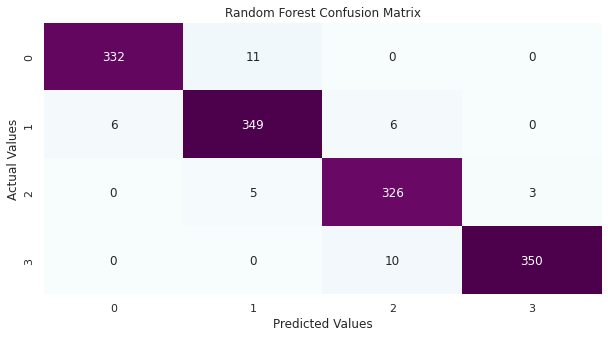

In [89]:
#Let us apply the function for the accuracy metrics for train set
print('Random Forest Classifier Accuracy Score: ',accuracy_score(y_train,y_pred_train_r))
cm_rfc=my_confusion_matrix(y_train, y_pred_train_r, 'Random Forest Confusion Matrix')
rfc_accuracy_train=accuracy_score(y_train,y_pred_train_r)

**So, we can see that the random forest algorithm has good accuracy in prediction**

In [90]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Random Forest ',
       'accuracy_score':rfc_accuracy_train
      }
classification_training_df=pd.DataFrame(dict1,index=[0])
classification_training_df

,Model,accuracy_score
0,Random Forest,0.970672


Random Forest Classifier Accuracy Score:  0.8916666666666667
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       157
           1       0.84      0.87      0.85       138
           2       0.86      0.85      0.85       166
           3       0.91      0.91      0.91       139

    accuracy                           0.89       600
   macro avg       0.89      0.89      0.89       600
weighted avg       0.89      0.89      0.89       600



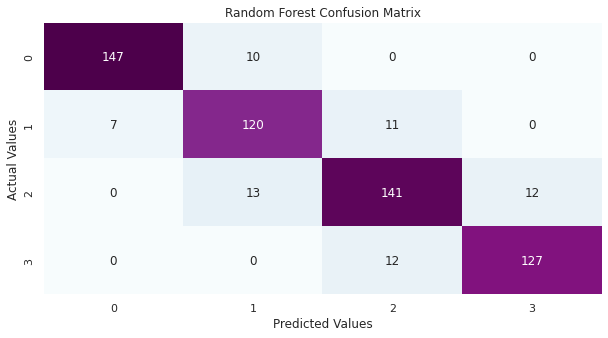

In [91]:
#Let us apply the function for the accuracy metrics for Test set
print('Random Forest Classifier Accuracy Score: ',accuracy_score(y_test,y_pred_test_r))
cm_rfc=my_confusion_matrix(y_test, y_pred_test_r, 'Random Forest Confusion Matrix')
rfc_accuracy_test=accuracy_score(y_test,y_pred_test_r)

In [92]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Random Forest ',
       'accuracy_score':rfc_accuracy_test
      }
classification_testing_df=pd.DataFrame(dict2,index=[1])
classification_testing_df

,Model,accuracy_score
1,Random Forest,0.891667


In [93]:
#Feature importances
features = X.columns
importances = rfc.feature_importances_
indices = np.argsort(importances)

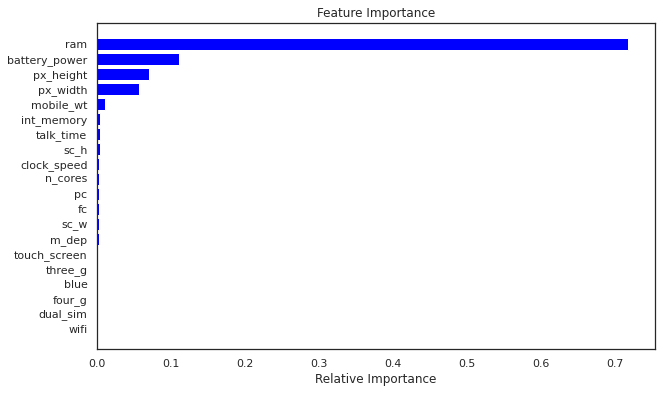

In [94]:
#Plot the figure
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# **Random forest GridSearchCV**

In [95]:
# Number of trees
n_estimators = [80,100,200]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [20,40,60]

# Minimum number of samples required at each leaf node
min_samples_leaf = [4,8,12]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [96]:
param_dict

{'n_estimators': [80, 100, 200],
 'max_depth': [4, 6, 8],
 'min_samples_split': [20, 40, 60],
 'min_samples_leaf': [4, 8, 12]}

In [97]:
#Importing Gradient Boosting Regressor
from sklearn.model_selection import GridSearchCV
# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

# Grid search
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2)

rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=4, min_samples_leaf=4, min_samples_split=20, n_estimators=80; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=4, min_samples_split=20, n_estimators=80; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=4, min_samples_split=20, n_estimators=80; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=4, min_samples_split=20, n_estimators=80; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=4, min_samples_split=20, n_estimators=80; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=4, min_samples_split=20, n_estimators=100; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=4, min_samples_split=20, n_estimators=100; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=4, min_samples_split=20, n_estimators=100; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=4, min_samples_split=20, n_estimators=100; total time=   0.2s
[CV] END max_depth=4, min_samples_

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [4, 8, 12],
                         'min_samples_split': [20, 40, 60],
                         'n_estimators': [80, 100, 200]},
             verbose=2)

In [98]:
#best estimators
rf_grid.best_estimator_

RandomForestClassifier(max_depth=8, min_samples_leaf=8, min_samples_split=20)

In [99]:
rf_optimal_model = rf_grid.best_estimator_

In [100]:
#best paramaeters
rf_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 8,
 'min_samples_split': 20,
 'n_estimators': 100}

In [101]:
#fitting optimal model parameters
rf_optimal_model.fit(x_train, y_train)
y_pred_test=rf_optimal_model.predict(x_test)
y_pred_train=rf_optimal_model.predict(x_train)


Random Forest Classifier GridSearchCV Accuracy Score for Train set:  0.9649499284692418
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       343
           1       0.96      0.95      0.96       361
           2       0.95      0.94      0.95       334
           3       0.97      0.98      0.98       360

    accuracy                           0.96      1398
   macro avg       0.96      0.96      0.96      1398
weighted avg       0.96      0.96      0.96      1398



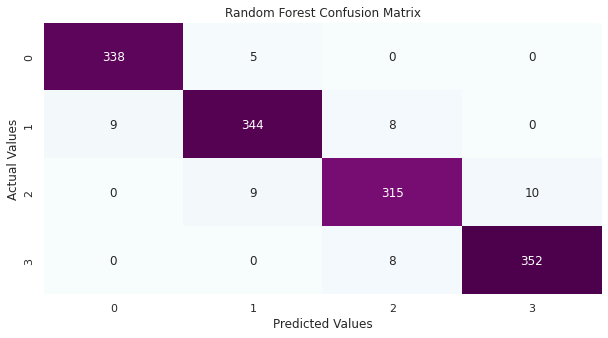

In [102]:
#Let us apply the function for the accuracy metrics for train set
print('Random Forest Classifier GridSearchCV Accuracy Score for Train set: ',accuracy_score(y_train,y_pred_train))
cm_rf=my_confusion_matrix(y_train, y_pred_train, 'Random Forest Confusion Matrix')
rfcg_accuracy_train=accuracy_score(y_train,y_pred_train)

In [103]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Random Forest Classifier GridSearchCV ',
       'accuracy_score':rfcg_accuracy_train
      }
classification_training_df=pd.DataFrame(dict1,index=[2])
classification_training_df

,Model,accuracy_score
2,Random Forest Classifier GridSearchCV,0.96495


Random Forest Classifier GridSearchCV Accuracy Score for test set:  0.8616666666666667
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       157
           1       0.82      0.88      0.85       138
           2       0.85      0.73      0.79       166
           3       0.82      0.91      0.86       139

    accuracy                           0.86       600
   macro avg       0.86      0.87      0.86       600
weighted avg       0.86      0.86      0.86       600



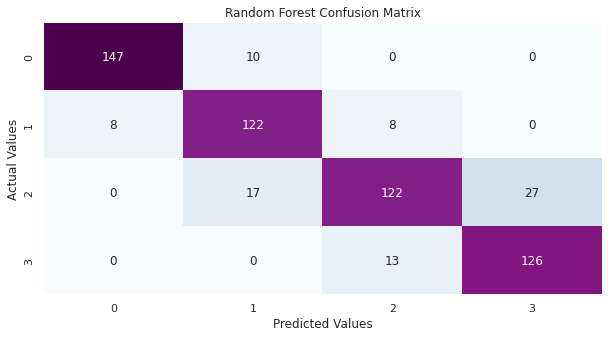

In [104]:
#Let us apply the function for the accuracy metrics
print('Random Forest Classifier GridSearchCV Accuracy Score for test set: ',accuracy_score(y_test,y_pred_test))
cm_rf=my_confusion_matrix(y_test, y_pred_test, 'Random Forest Confusion Matrix')
rfcg_accuracy_test=accuracy_score(y_test,y_pred_test)

In [105]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Random Forest Classifier GridSearchCV ',
       'accuracy_score':rfcg_accuracy_test
      }
classification_testing_df=pd.DataFrame(dict2,index=[3])
classification_testing_df

,Model,accuracy_score
3,Random Forest Classifier GridSearchCV,0.861667


In [106]:
features = X.columns
importances = rf_optimal_model.feature_importances_
indices = np.argsort(importances)

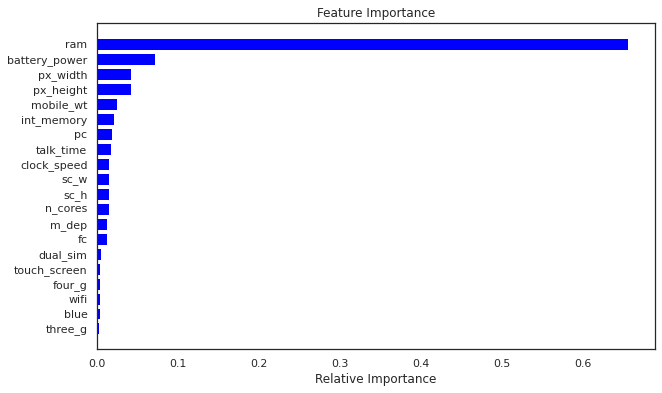

In [107]:
#Plot the figure
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# **DECISION TREE**

In [108]:
#import the packages
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [109]:
# Create Decision Tree classifer object
dt = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
dt = dt.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_train = dt.predict(X_train)
y_pred_test=dt.predict(X_test)

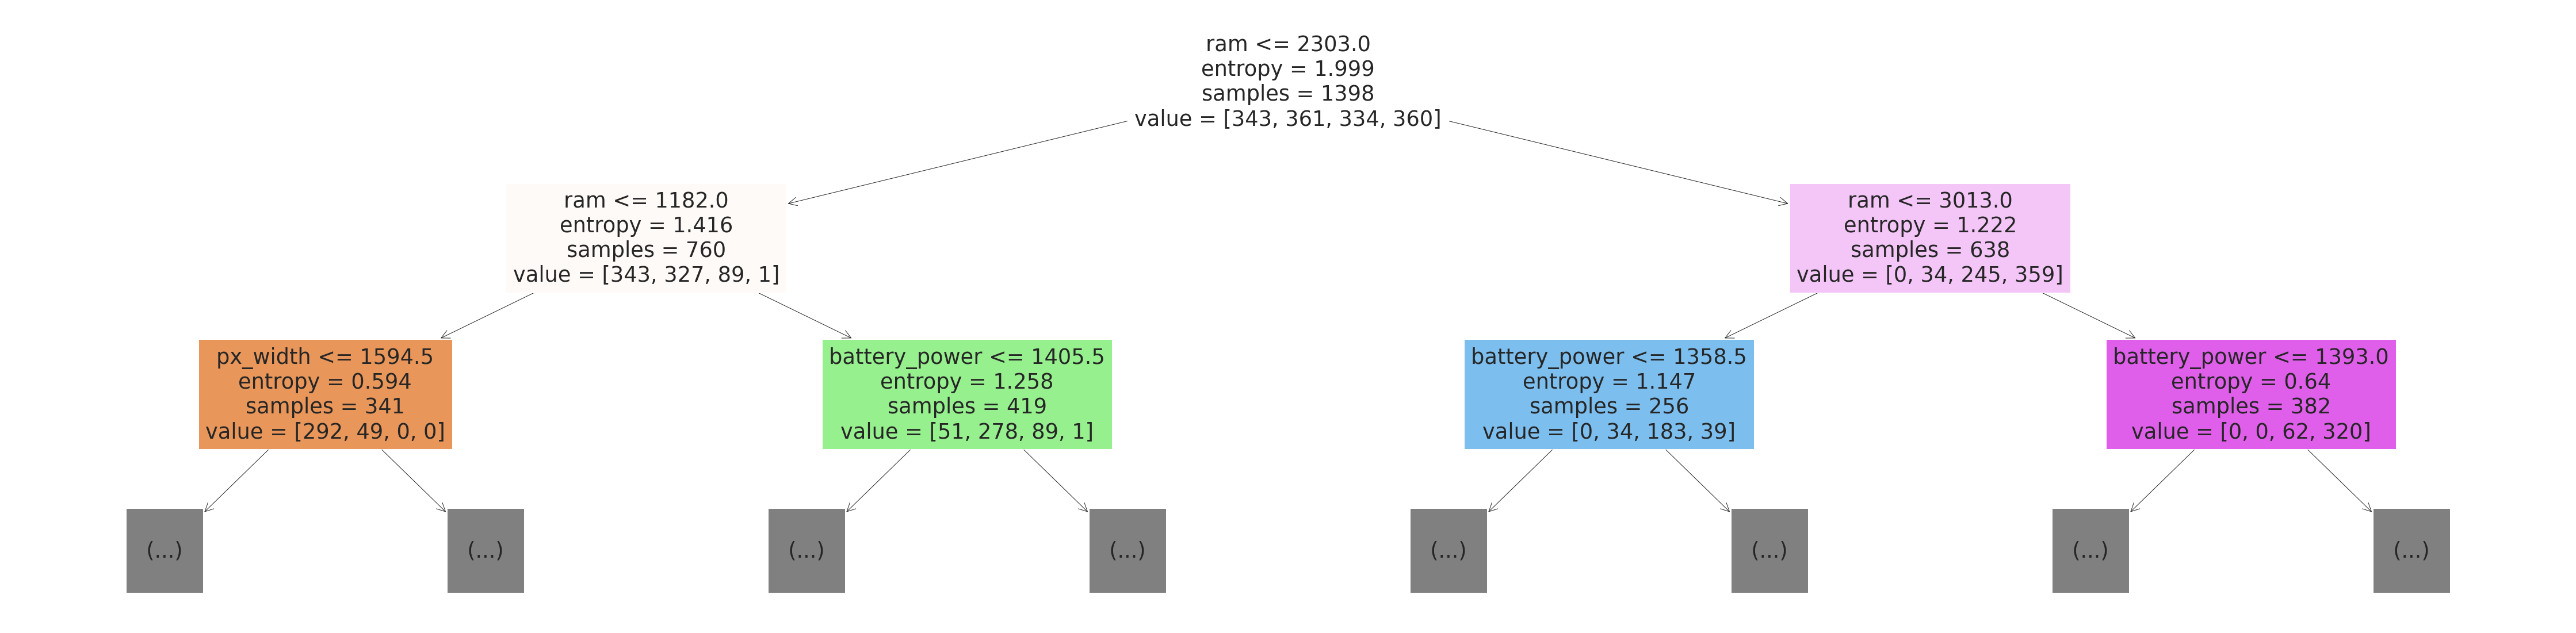

In [110]:
#Visualizing a Decision Tree
from sklearn.tree import plot_tree, export_text
plt.figure(figsize =(80,20))

plot_tree(dt, feature_names=X_train.columns, max_depth=2, filled=True);

Decision Tree classifer Accuracy Score:  0.7675250357653791
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       343
           1       0.66      0.77      0.71       361
           2       0.71      0.55      0.62       334
           3       0.84      0.89      0.86       360

    accuracy                           0.77      1398
   macro avg       0.77      0.76      0.76      1398
weighted avg       0.77      0.77      0.76      1398



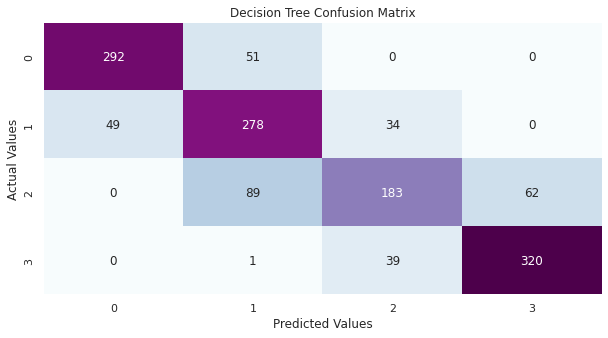

In [111]:
#Let us apply the function for the accuracy metrics on train set
print('Decision Tree classifer Accuracy Score: ',accuracy_score(y_train,y_pred_train))
cm_dt=my_confusion_matrix(y_train, y_pred_train, 'Decision Tree Confusion Matrix')
dt_accuracy_train=accuracy_score(y_train,y_pred_train)

In [112]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':' Decision Tree classifer ',
       'accuracy_score':dt_accuracy_train
      }
classification_training_df=pd.DataFrame(dict1,index=[4])
classification_training_df

,Model,accuracy_score
4,Decision Tree classifer,0.767525


Decision Tree classifer Accuracy Score:  0.74
              precision    recall  f1-score   support

           0       0.87      0.80      0.83       157
           1       0.60      0.78      0.68       138
           2       0.72      0.60      0.66       166
           3       0.81      0.80      0.80       139

    accuracy                           0.74       600
   macro avg       0.75      0.74      0.74       600
weighted avg       0.75      0.74      0.74       600



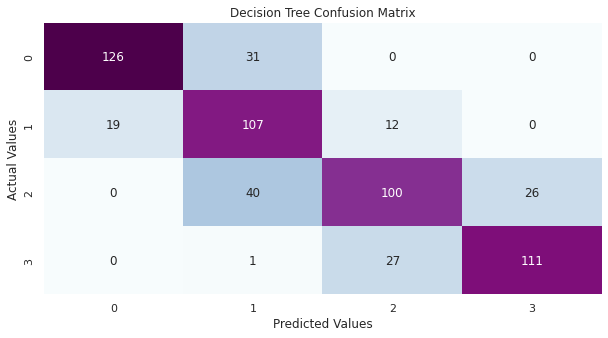

In [113]:
#Let us apply the function for the accuracy metrics on test set
print('Decision Tree classifer Accuracy Score: ',accuracy_score(y_test,y_pred_test))
cm_dt=my_confusion_matrix(y_test, y_pred_test, 'Decision Tree Confusion Matrix')
dt_accuracy_test=accuracy_score(y_test,y_pred_test)

In [114]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Decision Tree classifer ',
       'accuracy_score':dt_accuracy_test
      }
classification_testing_df=pd.DataFrame(dict2,index=[5])
classification_testing_df

,Model,accuracy_score
5,Decision Tree classifer,0.74


In [115]:
features = X.columns
importances = dt.feature_importances_
indices = np.argsort(importances)

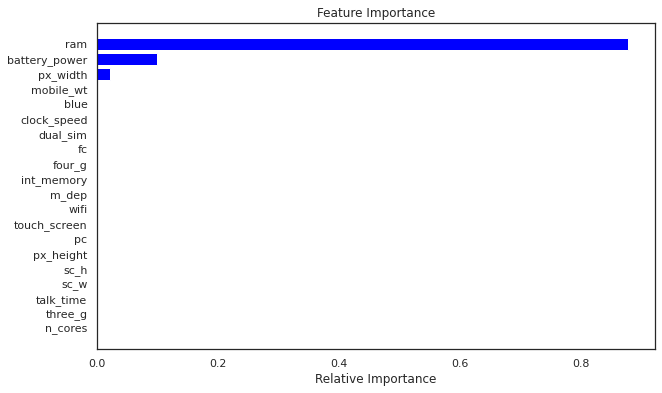

In [116]:
#Plot the figure
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

In [117]:
!pip install sklearn.cross_validation

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement sklearn.cross_validation (from versions: none)
ERROR: No matching distribution found for sklearn.cross_validation


# **Decision tree GridSearchCV**

In [118]:
from sklearn.model_selection import GridSearchCV

In [119]:
# Create the parameter grid 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [120]:
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [121]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=3),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [122]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5)

In [123]:
dt_best=grid_search.best_estimator_

In [124]:
#fitting optimal model parameters
dt_best.fit(x_train, y_train)
y_pred_test=dt_best.predict(x_test)
y_pred_train=dt_best.predict(x_train)

Decision Tree GridSearchCV classifer Accuracy Score:  0.9470672389127325
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       343
           1       0.94      0.93      0.93       361
           2       0.91      0.93      0.92       334
           3       0.97      0.96      0.96       360

    accuracy                           0.95      1398
   macro avg       0.95      0.95      0.95      1398
weighted avg       0.95      0.95      0.95      1398



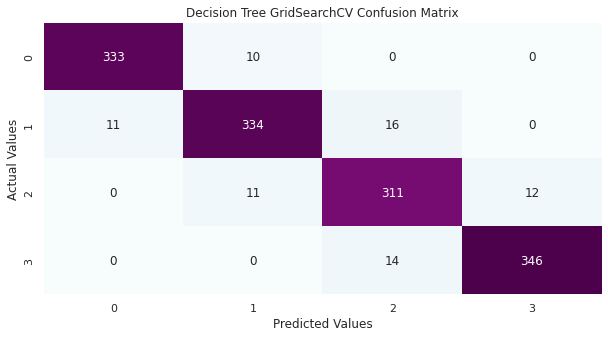

In [125]:
#Let us apply the function for the accuracy metrics on train set
print('Decision Tree GridSearchCV classifer Accuracy Score: ',accuracy_score(y_train,y_pred_train))
cm_dt=my_confusion_matrix(y_train, y_pred_train, 'Decision Tree GridSearchCV Confusion Matrix')
dt_accuracy_train=accuracy_score(y_train,y_pred_train)

In [126]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':' Decision Tree GridSearchCV ',
       'accuracy_score':dt_accuracy_train
      }
classification_training_df=pd.DataFrame(dict1,index=[6])
classification_training_df

,Model,accuracy_score
6,Decision Tree GridSearchCV,0.947067


Decision Tree GridSearchCV classifer Accuracy Score:  0.84
              precision    recall  f1-score   support

           0       0.94      0.87      0.90       157
           1       0.75      0.80      0.77       138
           2       0.80      0.81      0.80       166
           3       0.88      0.89      0.89       139

    accuracy                           0.84       600
   macro avg       0.84      0.84      0.84       600
weighted avg       0.84      0.84      0.84       600



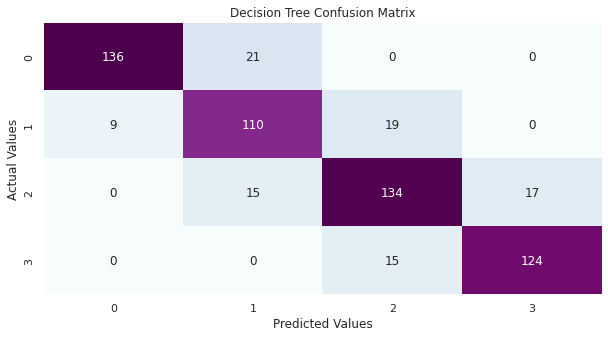

In [127]:
#Let us apply the function for the accuracy metrics on test set
print('Decision Tree GridSearchCV classifer Accuracy Score: ',accuracy_score(y_test,y_pred_test))
cm_dt=my_confusion_matrix(y_test, y_pred_test, 'Decision Tree Confusion Matrix')
dt_accuracy_test=accuracy_score(y_test,y_pred_test)

In [128]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Decision Tree classifer ',
       'accuracy_score':dt_accuracy_test
      }
classification_testing_df=pd.DataFrame(dict2,index=[7])
classification_testing_df

,Model,accuracy_score
7,Decision Tree classifer,0.84


# **Feature Importance Selection**

In [129]:
feat_imp = ExtraTreesClassifier()
feat_imp.fit(X_train,y_train)

ExtraTreesClassifier()

In [130]:
ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

ExtraTreesClassifier()

In [131]:
print(feat_imp.feature_importances_)

[0.06054132 0.02053288 0.03483915 0.02052197 0.0322842  0.01898907
 0.03653675 0.03366342 0.03764608 0.03267596 0.03503234 0.04475142
 0.04675068 0.38604538 0.03574038 0.03519285 0.03530644 0.01497642
 0.01746157 0.02051172]


In [132]:
features = X.columns
importances = feat_imp.feature_importances_
indices = np.argsort(importances)

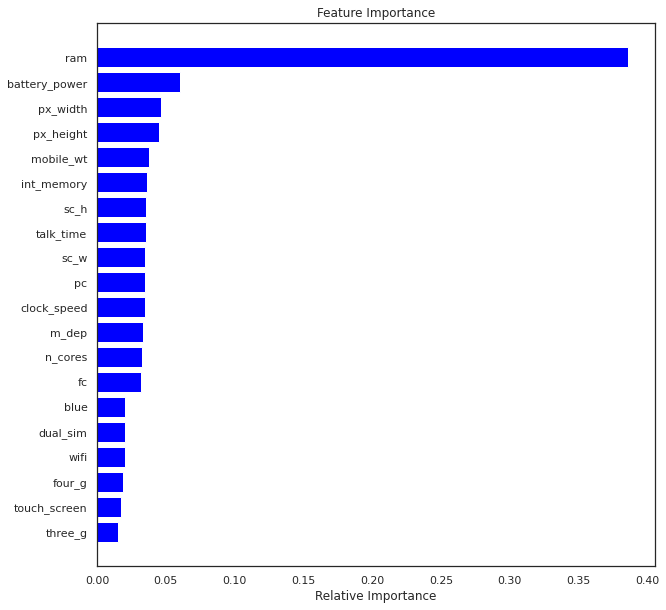

In [133]:
#Plot the figure
plt.figure(figsize=(10,10))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# **KNN Classifier**

The K Nearest Neighbor method is a type of supervised learning technique that is used for classification and regression. It’s a flexible approach that may also be used to fill in missing values and resample datasets. K Nearest Neighbor examines K Nearest Neighbors (Data points) to forecast the class or continuous value for a new Datapoint, as the name indicates.

In [134]:
## Create knn classifer object
knn = KNeighborsClassifier(n_neighbors=3,leaf_size=25)

In [135]:
#fitting model
knn.fit(X_train, y_train)
y_pred_train=knn.predict(X_train)
y_pred_test=knn.predict(X_test)

KNN Classifier Accuracy Score for train set:  0.932761087267525
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       343
           1       0.92      0.93      0.92       361
           2       0.90      0.90      0.90       334
           3       0.95      0.94      0.95       360

    accuracy                           0.93      1398
   macro avg       0.93      0.93      0.93      1398
weighted avg       0.93      0.93      0.93      1398



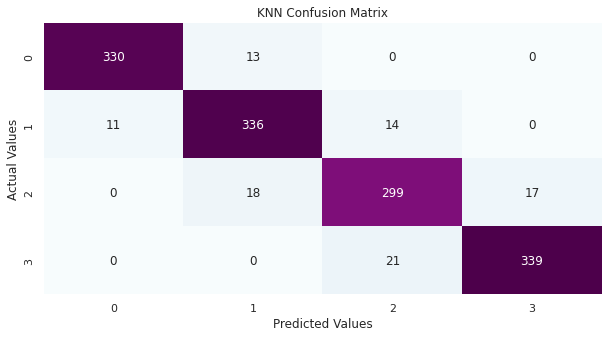

In [136]:
#Let us apply the function for the accuracy metrics on train set
print('KNN Classifier Accuracy Score for train set: ',accuracy_score(y_train,y_pred_train))
cm_rfc=my_confusion_matrix(y_train,y_pred_train, 'KNN Confusion Matrix')
knn_accuracy_train=accuracy_score(y_train,y_pred_train)

In [137]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':' KNN classifer ',
       'accuracy_score':knn_accuracy_train
      }
classification_training_df=pd.DataFrame(dict1,index=[8])
classification_training_df

,Model,accuracy_score
8,KNN classifer,0.932761


KNN Classifier Accuracy Score for test set:  0.8783333333333333
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       157
           1       0.81      0.86      0.84       138
           2       0.85      0.87      0.86       166
           3       0.94      0.87      0.90       139

    accuracy                           0.88       600
   macro avg       0.88      0.88      0.88       600
weighted avg       0.88      0.88      0.88       600



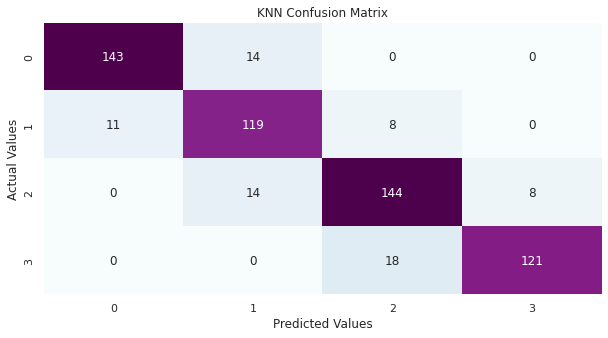

In [138]:
#Let us apply the function for the accuracy metrics on test set
print('KNN Classifier Accuracy Score for test set: ',accuracy_score(y_test,y_pred_test))
cm_rfc=my_confusion_matrix(y_test, y_pred_test, 'KNN Confusion Matrix')
knn_accuracy_test=accuracy_score(y_test,y_pred_test)

In [139]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Decision Tree classifer ',
       'accuracy_score':knn_accuracy_test
      }
classification_testing_df=pd.DataFrame(dict2,index=[9])
classification_testing_df

,Model,accuracy_score
9,Decision Tree classifer,0.878333


# **SVM Classifier**

Support Vector Machine, or SVM, is a prominent Supervised Learning technique that is used for both classification and regression issues. However, it is mostly utilised in Machine Learning for Classification purposes.

The SVM algorithm’s purpose is to find the optimum line or decision boundary for categorising n-dimensional space so that we may simply place fresh data points in the proper category in the future. A hyperplane is the optimal choice boundary.

In [140]:
# Create SVM classifer object
svm_clf = svm.SVC(decision_function_shape='ovo')

In [141]:
#fitting model
svm_clf.fit(X_train, y_train)
y_pred_train=svm_clf.predict(X_train)
y_pred_test=svm_clf.predict(X_test)


SVM Classifier Accuracy Score on train set:  0.8962804005722461
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       343
           1       0.85      0.89      0.87       361
           2       0.89      0.82      0.85       334
           3       0.92      0.94      0.93       360

    accuracy                           0.90      1398
   macro avg       0.90      0.90      0.90      1398
weighted avg       0.90      0.90      0.90      1398



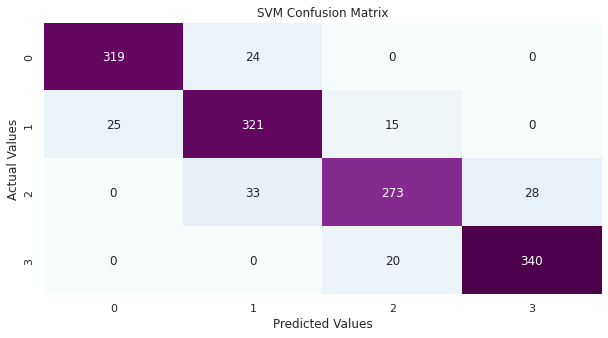

In [142]:
#confuse matrix for train data
print('SVM Classifier Accuracy Score on train set: ',accuracy_score(y_train,y_pred_train))
cm_rfc=my_confusion_matrix(y_train, y_pred_train, 'SVM Confusion Matrix')
svm_accuracy_train=accuracy_score(y_train,y_pred_train)

In [143]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':' SVM classifer ',
       'accuracy_score':svm_accuracy_train
      }
classification_training_df=pd.DataFrame(dict1,index=[10])
classification_training_df

,Model,accuracy_score
10,SVM classifer,0.89628


SVM Classifier Accuracy Score on test set:  0.8983333333333333
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       157
           1       0.88      0.86      0.87       138
           2       0.86      0.87      0.86       166
           3       0.91      0.91      0.91       139

    accuracy                           0.90       600
   macro avg       0.90      0.90      0.90       600
weighted avg       0.90      0.90      0.90       600



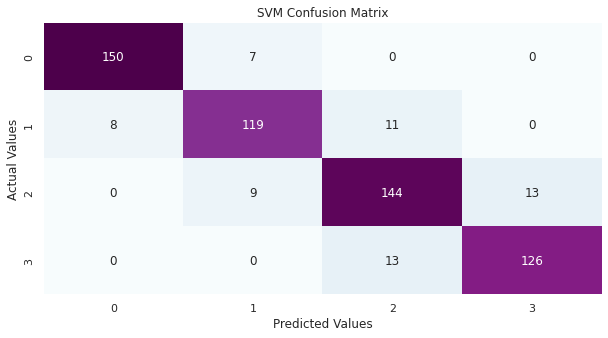

In [144]:
#confusion matrix for test data
print('SVM Classifier Accuracy Score on test set: ',accuracy_score(y_test,y_pred_test))
cm_rfc=my_confusion_matrix(y_test, y_pred_test, 'SVM Confusion Matrix')
svm_accuracy_test=accuracy_score(y_test,y_pred_test)

In [145]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'SVM classifer ',
       'accuracy_score':svm_accuracy_test
      }
classification_testing_df=pd.DataFrame(dict2,index=[11])
classification_testing_df

,Model,accuracy_score
11,SVM classifer,0.898333


# **NAIVE BAYES CLASSIFIER** 

In [146]:
#Let us implement the Gaussian NB classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [147]:
#fitting model
gnb.fit(X_train, y_train)
y_pred_train=gnb.predict(X_train)
y_pred_test=gnb.predict(X_test)

Gaussian NB Classifier Accuracy Score:  0.8068669527896996
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       343
           1       0.72      0.75      0.73       361
           2       0.71      0.68      0.69       334
           3       0.89      0.90      0.90       360

    accuracy                           0.81      1398
   macro avg       0.81      0.81      0.81      1398
weighted avg       0.81      0.81      0.81      1398



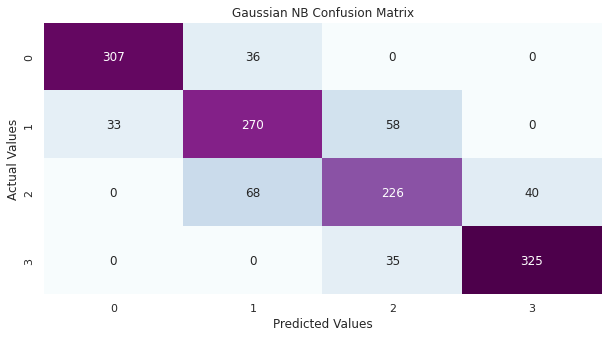

In [148]:
#plotting confusion matrix
print('Gaussian NB Classifier Accuracy Score: ',accuracy_score(y_train,y_pred_train))
cm_rfc=my_confusion_matrix(y_train, y_pred_train, 'Gaussian NB Confusion Matrix')
NB_accuracy_train=accuracy_score(y_train,y_pred_train)

In [149]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'naive bayes  classifer ',
       'accuracy_score':NB_accuracy_train
      }
classification_training_df=pd.DataFrame(dict1,index=[12])
classification_training_df

,Model,accuracy_score
12,naive bayes classifer,0.806867


Gaussian NB Classifier Accuracy Score:  0.7916666666666666
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       157
           1       0.68      0.69      0.68       138
           2       0.73      0.78      0.75       166
           3       0.88      0.85      0.86       139

    accuracy                           0.79       600
   macro avg       0.80      0.79      0.79       600
weighted avg       0.80      0.79      0.79       600



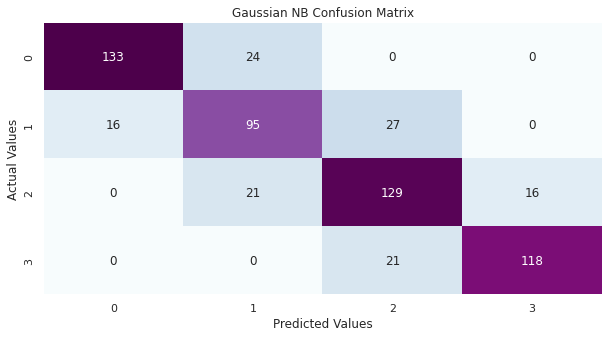

In [150]:
#confusion matrix
print('Gaussian NB Classifier Accuracy Score: ',accuracy_score(y_test,y_pred_test))
cm_rfc=my_confusion_matrix(y_test, y_pred_test, 'Gaussian NB Confusion Matrix')
NB_accuracy_test=accuracy_score(y_test,y_pred_test)

In [151]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'naive bayes classifer ',
       'accuracy_score':NB_accuracy_test
      }
classification_testing_df=pd.DataFrame(dict2,index=[13])
classification_testing_df

,Model,accuracy_score
13,naive bayes classifer,0.791667


# **XG Boost Classifier**

In [152]:
#start by loading the required libraries.
from xgboost import XGBClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold

In [153]:
#define the classifier model
xgbc = XGBClassifier()
#fit the model with train data
#fitting model
xgbc.fit(X_train, y_train)
y_pred_train=xgbc.predict(X_train)
y_pred_test=xgbc.predict(X_test)

In [154]:
xgbc_accuracy_train=accuracy_score(y_train,y_pred_train)
print('XG boost Classifier Accuracy Score: ',xgbc_accuracy_train)

XG boost Classifier Accuracy Score:  0.9899856938483548


In [155]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'XG Boost classifer ',
       'accuracy_score':xgbc_accuracy_train
      }
classification_training_df=pd.DataFrame(dict1,index=[14])
classification_training_df

,Model,accuracy_score
14,XG Boost classifer,0.989986


In [156]:
xgbc_accuracy_test=accuracy_score(y_test,y_pred_test)
print('XG boost Classifier Accuracy Score: ',xgbc_accuracy_test)

XG boost Classifier Accuracy Score:  0.9


In [157]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'XG boost classifer ',
       'accuracy_score':xgbc_accuracy_test
      }
classification_testing_df=pd.DataFrame(dict2,index=[15])
classification_testing_df

,Model,accuracy_score
15,XG boost classifer,0.9


there is a overfitting in this model

# **XG Boost GridSearchCV**

In [173]:
params = {
    'n_estimators': [10,20,30],
    'learning_rate': [0.01,0.05,0.1],
    'booster': ['gbtree', 'gblinear'],
    'gamma': [0, 0.5, 1],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0.5, 1, 5],
    'base_score': [0.2, 0.5, 1]
}

gs2 = GridSearchCV(XGBClassifier(n_jobs=-1), params, n_jobs=-1, cv=KFold(n_splits=3))
gs2.fit(X_train, y_train)

print('Best score:', gs2.best_score_)
print('Best score:', gs2.best_params_)

Best score: 0.8283261802575108
Best score: {'base_score': 0.2, 'booster': 'gbtree', 'gamma': 0.5, 'learning_rate': 0.1, 'n_estimators': 30, 'reg_alpha': 0, 'reg_lambda': 0.5}


##  It's not giving optimal score

# **using bar plot comparing accuracy score of all models**

In [206]:
df = pd.DataFrame({ 'train': [rfc_accuracy_train,rfcg_accuracy_train,dt_accuracy_train,knn_accuracy_train,
              svm_accuracy_train,NB_accuracy_train,xgbc_accuracy_train],
             'test': [rfc_accuracy_test, rfcg_accuracy_test, dt_accuracy_test, knn_accuracy_test, svm_accuracy_test, NB_accuracy_test, xgbc_accuracy_test]},
             index=['random forest','random forest grid','decision tree','knn','svm','naive bayes','xg boost'])

In [207]:
df

,train,test
random forest,0.970672,0.891667
random forest grid,0.964950,0.861667
decision tree,0.947067,0.840000
knn,0.932761,0.878333
svm,0.896280,0.898333
naive bayes,0.806867,0.791667
xg boost,0.989986,0.885551


Text(0, 0.5, 'Accuracy score')

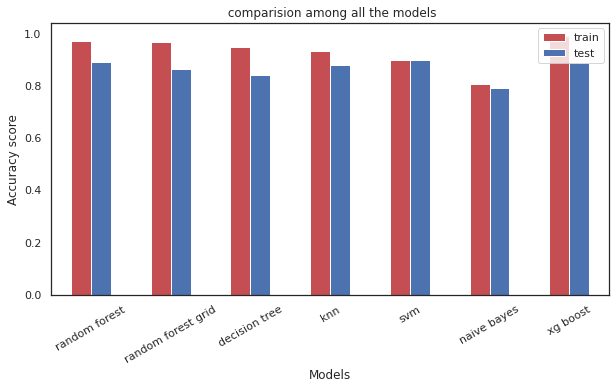

In [211]:
ax = df.plot(kind="bar",color='rb')
fig = ax.get_figure()
# Rotate the x-labels by 30 degrees, and keep the text aligned horizontally
plt.xticks(rotation=30, horizontalalignment="center")
plt.title(" comparision among all the models")
plt.xlabel("Models")
plt.ylabel("Accuracy score")


# **CONCLUSION**



## 1.we started with data understanding,data wrangling,basic EDA where we found various trend between price range and other independent variable.
## 2.Implemented various classification algorithms , out of which SVM algorithm gave the best performance.on both train and test set svm gave accuracy score of 89%
## 3.Naive bayes is the second good model which gave 80% on train and 79% on test data.
## 5.We checked for the feature important's of each model.ram,battery_power,px_height and px_width contributed the most while predicting price range. 

